<div style="text-align: center; margin: auto; background:#49699e; padding-top:10px; padding-bottom:10px; padding-left:none;">
    <h1>Exploratory Analysis of ABCDEats Customer Data</h1>
    <p>Data Mining Project</p>
    <p>2024/2025</p>
</div>

<h2 style='margin-bottom: 3px'>Group 41 members: </h2>
- Elcano Gaspar, 20241021 <br>
- Gaspar Pereira, 20230984 <br>
- Pedro Costa, 20222121<br>
- Rita Wang, 20240551<br>


<h2 style='margin-bottom: 3px'> Table of Contents </h2>

* [0. Imports and Dataset Loading](#imports)

* [1. Data Exploration](#dataexploration)
    * [1.1 Initial Analysis of the Dataset](#initial-analysis)
    * [1.2 Check for Missing Values](#missing-values)
    * [1.3 Duplicate Values](#duplicates)
    * [1.4 Data Types](#data-types)
    * [1.5 Variable Analysis](#variable-analysis)

* [2. Univariate Analysis](#univariate)
    * [2.1 Numerical Variables](#numerical)
    * [2.2 Categorical Variables](#categorical)

* [3. Data Preprocessing](#data-preprocessing)
    * [3.1 Feature Engineering](#feature-engineering)
        * [3.1.1 Numerical New Features](#numerical-new)
        * [3.1.2 Categorical New Features](#categorical-new)
    * [3.2 Imputation of Missing Values](#impute-missing)
    * [3.3 Outlier Removal](#outlier-removal)

* [4. Multivariate Analysis](#multivariate)
    * [4.1 Numericals vs. Numericals](#numerical-numerical)
    * [4.2 Categoricals vs. Categoricals](#categorical-categorical)
    * [4.3 Categoricals vs. Numericals](#categorical-numerical)
    * [4.4 Three Variables Associations](#3-variables)
    * [4.5 Co-occurrences](#co-occurences)


<h2 id='imports'>0. Imports and dataset loading</h2>

In [2]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import warnings

from itertools import combinations
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.preprocessing import RobustScaler


warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("../Project data/DM2425_ABCDEats_DATASET.csv")

In [19]:
def missing_data(df):
    """
    Gives the count and percentage of missing values for each column in a DataFrame
    """    
    # Number of missing values in each column
    missing_count = df.isnull().sum()
    
    # Percentage of missing values for each column
    missing_percentage = ((missing_count / df.shape[0]) * 100).round(2)
    
    missing_data = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing %': missing_percentage
    })
    
    # Show only columns with missing values
    missing_data = missing_data[missing_data['Missing Count'] > 0]
    
    # Sort in descending order
    missing_data = missing_data.sort_values(by='Missing Count', ascending=False)
    return missing_data

<h2 id='dataexploration'>1. Data Exploration</h2>

<h3 id='initial-analysis'>1.1 Initial analysis of the dataset</h3>

In [3]:
df.head()

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360          18.0             2              5   
1  5d272b9dcb            8670          17.0             2              2   
2  f6d1b2ba63            4660          38.0             1              2   
3  180c632ed8            4660           NaN             2              3   
4  4eb37a6705            4660          20.0             2              5   

   is_chain  first_order  last_order last_promo payment_method  ...  HR_14  \
0         1          0.0           1   DELIVERY           DIGI  ...      0   
1         2          0.0           1   DISCOUNT           DIGI  ...      0   
2         2          0.0           1   DISCOUNT           CASH  ...      0   
3         1          0.0           2   DELIVERY           DIGI  ...      1   
4         0          0.0           2          -           DIGI  ...      0   

   HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
0      0      0      0      2      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0  

[5 rows x 56 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

<h3 id='missing-values'>1.2 Check for missing values</h3>


In [20]:
missing_data(df)

Missing Count  Missing %
HR_0                   1165       3.65
customer_age            727       2.28
first_order             106       0.33

Missing values in HR_0, customer_age and first_order. We'll look into taking care of these afterwards.\
`Low Missingness (<5%)`: HR_0, Customer_age and First_order (can be imputed without introducing bias)

<h3 id='duplicates'>1.3 Duplicate values</h3->

In [6]:
df[df.duplicated(keep=False)]

customer_id customer_region  customer_age  vendor_count  product_count  \
3355   b55012ee1c            8550          23.0             4             11   
3379   b55012ee1c            8550          23.0             4             11   
7867   24251eb7da            8550          28.0             4              8   
7887   24251eb7da            8550          28.0             4              8   
16227  671bf0c738            8550          25.0             4              7   
16230  671bf0c738            8550          25.0             4              7   
20855  742ca068fc            8550          20.0             1              2   
20907  742ca068fc            8550          20.0             1              2   
24328  df91183978            8550          23.0             2              3   
24329  df91183978            8550          23.0             2              3   
24822  6bbf5f74cd            8550          22.0            10             20   
24827  6bbf5f74cd            8550          22.0            10             20   
25792  8aa9bbc147            8550          24.0             2              4   
25793  8aa9bbc147            8550          24.0             2              4   
27514  cf563a0a98            8550          27.0             2              2   
27515  cf563a0a98            8550          27.0             2              2   
27653  201a13a34d            8550          28.0             2              2   
27739  201a13a34d            8550          28.0             2              2   
28706  06018a56be            8550          27.0             2              2   
28713  06018a56be            8550          27.0             2              2   
29922  fac7984c0d            8550          29.0             1              1   
29926  fac7984c0d            8550          29.0             1              1   
30402  b8e7a643a4            8550          18.0             2              4   
30416  b8e7a643a4            8550          18.0             2              4   
31639  cc08ef25ce            8550          31.0             1              2   
31653  cc08ef25ce            8550          31.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  ...  \
3355          1          2.0          89    FREEBIE           CARD  ...   
3379          1          2.0          89    FREEBIE           CARD  ...   
7867          3          7.0          85          -           CARD  ...   
7887          3          7.0          85          -           CARD  ...   
16227         3         23.0          66    FREEBIE           CARD  ...   
16230         3         23.0          66    FREEBIE           CARD  ...   
20855         0         35.0          35          -           CARD  ...   
20907         0         35.0          35          -           CARD  ...   
24328         1         47.0          52   DELIVERY           CARD  ...   
24329         1         47.0          52   DELIVERY           CARD  ...   
24822         9         48.0          88          -           CARD  ...   
24827         9         48.0          88          -           CARD  ...   
25792         2         53.0          59   DELIVERY           DIGI  ...   
25793         2         53.0          59   DELIVERY           DIGI  ...   
27514         0         61.0          62    FREEBIE           CASH  ...   
27515         0         61.0          62    FREEBIE           CASH  ...   
27653         1         62.0          62   DELIVERY           CARD  ...   
27739         1         62.0          62   DELIVERY           CARD  ...   
28706         0         67.0          89    FREEBIE           DIGI  ...   
28713         0         67.0          89    FREEBIE           DIGI  ...   
29922         0         75.0          75   DELIVERY           CARD  ...   
29926         0         75.0          75   DELIVERY           CARD  ...   
30402         0         78.0          78    FREEBIE           CASH  ...   
30416         0         78.0          78    F

> There are 13 duplicates, note that its curious how they all have the same customer_region 8550. Since we don't consider these to be actual cases, and simply input error, we'll delete the duplicates.

In [7]:
df_original = df.copy()
df = df.drop_duplicates()
df_original.shape[0] - df.shape[0] #Display number of duplicates dropped

13

<h3 id='data-types'>1.4 Data types</h3>

In [8]:
df.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

> <code>customer_age</code>,<code>HR_0</code> and <code>first_order</code> should be int, but are floats right now because of the missing values.

><code>customer_region</code> should be categorical, but we'll change this only after deciding how to group the 3 regions.

<h3 id='variable-analysis'>1.5 Variable analysis</h3>

Separating the variables in continuous and categorical to make the analysis of the variables easier.
| Numerical Variables | Categorical Variables |
| --- | --- |
| customer_age | customer_region |
| vendor_count |last_promo  |
| product_count | payment_method |
|is_chain| |
|first_order||
|last_order||
|CUI||
|HR_0 to HR_23||
|DOW_0 to DOW_6||

In [28]:
numerical = ['customer_id', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order',
        'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']

categorical = ['customer_region','last_promo','payment_method']

> It makes sense to group the different types of CUI, the DOW, and HR. Let's create variables saving each of them:

<h3>1.6 Unique values</h3>

In [37]:
for column in numerical:
    print(f'{column}:{df[column].unique()}')

customer_id:['1b8f824d5e' '5d272b9dcb' 'f6d1b2ba63' ... 'f74ad8ce3f' 'f7b19c0241'
 'fd40d3b0e0']
customer_age:[18. 17. 38. nan 20. 40. 24. 27. 33. 26. 21. 51. 35. 22. 31. 15. 47. 19.
 28. 32. 25. 37. 42. 48. 16. 34. 29. 23. 30. 39. 46. 41. 49. 53. 36. 43.
 44. 45. 57. 58. 68. 56. 61. 60. 54. 59. 50. 55. 52. 65. 75. 66. 79. 80.
 63. 77. 62. 69. 72. 64. 76. 74. 67. 70. 78. 71. 73.]
vendor_count:[ 2  1  3  4  5  7  6 11  9  8 12 14 20 13 10 16 24 18 17 15 25 30 19 21
 23 22 28 32 41 40 26  0 27 34 31 35 29]
product_count:[  5   2   3   4   6  10   8  17   7  26   9  32  15  13  16  28  19  12
  18  11  25  14  23  29  21  31  95  24  64  27  37  49  22  41  51  34
  39  20  30  47  40  53  38  54  35  33  56  65  45  63  36  79  48  70
  44  84  46  66  57  58  83 110 117 269  75  55  42  81  91  43  69  67
  72  59   1   0  77  97  87  73  76  60 109  52  62  94  80  89  61  82
  50  88  68]
is_chain:[ 1  2  0  3  5  4  7 12  6 23  8 11 20 14  9 10 16 15 13 25 17 27 30 32
 24 18 26 28 22

In [38]:
for column in categorical:
    print(f'{column}:{df[column].unique()}')

customer_region:['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']
last_promo:['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
payment_method:['DIGI' 'CASH' 'CARD']


In [33]:
(df['customer_region']=='-').sum()

np.int64(442)

In [34]:
(df['last_promo']=='-').sum()

np.int64(16748)

> There are 442 '-' instead of an customer region, we will consider this to be a missing value and convert it to NaN.

> 16748 of the values in last_promo are '-', we will consider this to be the cases where the customers didn't use a promo code.

<h3>1.7 Inconherences</h3>

> <code>is_chain</code>'s description says that it indicates whether the customer's order was from a chain restaurant. We will consider the numbers as being the number of times that a customer has ordered from a chain restaurant.

> Let's just check if the number of is_chain is lower than the total number of orders that the customers have made. 

In [40]:
dow_cols = [col for col in df.columns if "DOW" in col]

df["total_orders"] = df[dow_cols].apply(lambda x: x.sum(), axis=1)


In [42]:
df[df['is_chain']>df['total_orders']]

customer_id customer_region  customer_age  vendor_count  product_count  \
1449   4903041977            8670          22.0             0              0   
1488   f687717dc1            8670          21.0             0              0   
7123   376f896388            8670          29.0             0              0   
7152   8a7b681c19            8670          17.0             0              0   
7166   a2b54d0827            8670          24.0             0              0   
...           ...             ...           ...           ...            ...   
31131  00b63adfed            8670          27.0             0              0   
31334  c3d607c31f            8670          35.0             0              0   
31377  177ede2420            8670          30.0             0              0   
31553  0039059c9c            8670          22.0             0              0   
31695  4c06e104de            8670          25.0             0              0   

       is_chain  first_order  last_order last_promo payment_method  ...  \
1449          1          1.0           1   DELIVERY           DIGI  ...   
1488          1          1.0           1   DELIVERY           DIGI  ...   
7123          1          7.0           7   DELIVERY           CARD  ...   
7152          1          7.0           7          -           CASH  ...   
7166          1          7.0           7   DELIVERY           CASH  ...   
...         ...          ...         ...        ...            ...  ...   
31131         1         84.0          84   DELIVERY           CASH  ...   
31334         1         85.0          85   DISCOUNT           DIGI  ...   
31377         1         86.0          86          -           DIGI  ...   
31553         1         88.0          88   DISCOUNT           CARD  ...   
31695         1         89.0          89          -           CASH  ...   

       HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  \
1449       0      0      0      0      0      0      0      0      0   
1488       0      0      0      0      0      0      0      0      0   
7123       0      0      0      0      0      0      0      0      0   
7152       0      0      0      0      0      0      0      0      0   
7166       0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...   
31131      0      0      0      0      0      0      0      0      0   
31334      0      0      0      0      0      0      0      0      0   
31377      0      0      0      0      0      0      0      0      0   
31553      0      0      0      0      0      0      0      0      0   
31695      0      0      0      0      0      0      0      0      0   

       total_orders  
1449              0  
1488              0  
7123              0  
7152              0  
7166              0  
...             ...  
31131             0  
31334             0  
31377             0  
31553             0  
31695             0  

[75 rows x 57 columns]

In [ ]:
df[(df['total_orders']==0)&(df[''])]

In [14]:
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

In [3]:
df.loc[:,:]

customer_id customer_region  customer_age  vendor_count  product_count  \
0      1b8f824d5e            2360          18.0             2              5   
1      5d272b9dcb            8670          17.0             2              2   
2      f6d1b2ba63            4660          38.0             1              2   
3      180c632ed8            4660           NaN             2              3   
4      4eb37a6705            4660          20.0             2              5   
...           ...             ...           ...           ...            ...   
31883  f4e366c281            8670          30.0             1              1   
31884  f6b6709018            8670           NaN             1              1   
31885  f74ad8ce3f            8670          24.0             1              1   
31886  f7b19c0241            8670          34.0             1              1   
31887  fd40d3b0e0            4660          30.0             1              1   

       is_chain  first_order  last_order last_promo payment_method  ...  \
0             1          0.0           1   DELIVERY           DIGI  ...   
1             2          0.0           1   DISCOUNT           DIGI  ...   
2             2          0.0           1   DISCOUNT           CASH  ...   
3             1          0.0           2   DELIVERY           DIGI  ...   
4             0          0.0           2          -           DIGI  ...   
...         ...          ...         ...        ...            ...  ...   
31883         1          NaN           0    FREEBIE           DIGI  ...   
31884         0          NaN           0   DELIVERY           DIGI  ...   
31885         1          NaN           0          -           DIGI  ...   
31886         0          NaN           0   DISCOUNT           DIGI  ...   
31887         0          NaN           0          -           CASH  ...   

       HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
0          0      0      0      0      2      0      0      0      0      0  
1          0      0      0      0      0      0      0      0      0      0  
2          0      0      0      0      0      0      0      0      0      0  
3          1      0      0      0      0      0      0      0      0      0  
4          0      0      0      0      0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
31883      0      0      0      0      0      0      0      0      0      0  
31884      0      0      1      0      0      0      0      0      0      0  
31885      0      0      0      0      0      0      0      0      0      0  
31886      0      0      0      0      0      0      0      0      0      0  
31887      0      0      1      0      0      0      0      0      0      0  

[31888 rows x 56 columns]

<h2 id='univariate'>2. Univariate analysis</h2>

<h3 id='numerical'>2.1 Numerical variables</h3>

In [9]:
df.describe().T

count       mean        std   min   25%   50%  \
customer_age              31148.0  27.507545   7.161828  15.0  23.0  26.0   
vendor_count              31875.0   3.102714   2.771753   0.0   1.0   2.0   
product_count             31875.0   5.668424   6.957933   0.0   2.0   3.0   
is_chain                  31875.0   2.819357   3.977977   0.0   1.0   2.0   
first_order               31769.0  28.469924  24.104626   0.0   7.0  22.0   
last_order                31875.0  63.672376  23.227992   0.0  49.0  70.0   
CUI_American              31875.0   4.877205  11.647043   0.0   0.0   0.0   
CUI_Asian                 31875.0   9.955306  23.561492   0.0   0.0   0.0   
CUI_Beverages             31875.0   2.298224   8.475868   0.0   0.0   0.0   
CUI_Cafe                  31875.0   0.801490   6.428422   0.0   0.0   0.0   
CUI_Chicken Dishes        31875.0   0.768409   3.657986   0.0   0.0   0.0   
CUI_Chinese               31875.0   1.431801   8.193374   0.0   0.0   0.0   
CUI_Desserts              31875.0   0.884719   5.260910   0.0   0.0   0.0   
CUI_Healthy               31875.0   0.950590   5.831747   0.0   0.0   0.0   
CUI_Indian                31875.0   1.631818   7.444679   0.0   0.0   0.0   
CUI_Italian               31875.0   3.234729  11.250094   0.0   0.0   0.0   
CUI_Japanese              31875.0   2.996031  10.182406   0.0   0.0   0.0   
CUI_Noodle Dishes         31875.0   0.711966   4.537359   0.0   0.0   0.0   
CUI_OTHER                 31875.0   3.001137   9.770104   0.0   0.0   0.0   
CUI_Street Food / Snacks  31875.0   3.910391  15.548367   0.0   0.0   0.0   
CUI_Thai                  31875.0   0.842040   4.433918   0.0   0.0   0.0   
DOW_0                     31875.0   0.555922   1.013634   0.0   0.0   0.0   
DOW_1                     31875.0   0.567561   1.044190   0.0   0.0   0.0   
DOW_2                     31875.0   0.590933   1.045900   0.0   0.0   0.0   
DOW_3                     31875.0   0.619388   1.069558   0.0   0.0   0.0   
DOW_4                     31875.0   0.677867   1.088284   0.0   0.0   0.0   
DOW_5                     31875.0   0.652957   1.069802   0.0   0.0   0.0   
DOW_6                     31875.0   0.704408   1.167592   0.0   0.0   0.0   
HR_0                      30711.0   0.000000   0.000000   0.0   0.0   0.0   
HR_1                      31875.0   0.053835   0.317031   0.0   0.0   0.0   
HR_2                      31875.0   0.063153   0.351490   0.0   0.0   0.0   
HR_3                      31875.0   0.118306   0.497117   0.0   0.0   0.0   
HR_4                      31875.0   0.101710   0.437549   0.0   0.0   0.0   
HR_5                      31875.0   0.081914   0.358701   0.0   0.0   0.0   
HR_6                      31875.0   0.069616   0.329307   0.0   0.0   0.0   
HR_7                      31875.0   0.076675   0.377349   0.0   0.0   0.0   
HR_8                      31875.0   0.131859   0.635603   0.0   0.0   0.0   
HR_9                      31875.0   0.233945   0.725015   0.0   0.0   0.0   
HR_10                     31875.0   0.329663   0.891312   0.0   0.0   0.0   
HR_11                     31875.0   0.378259   0.960119   0.0   0.0   0.0   
HR_12                     31875.0   0.314259   0.842625   0.0   0.0   0.0   
HR_13                     31875.0   0.236424   0.637513   0.0   0.0   0.0   
HR_14                     31875.0   0.215686   0.599098   0.0   0.0   0.0   
HR_15                     31875.0   0.277114   0.738282   0.0   0.0   0.0   
HR_16                     31875.0   0.356580   0.874598   0.0   0.0   0.0   
HR_17                     31875.0   0.391059   0.943873   0.0   0.0   0.0   
HR_18                     31875.0   0.337098   0.894106   0.0   0.0   0.0   
HR_19                     31875.0   0.245678   0.795433   0.0   0.0   0.0   
HR_20                     31875.0   0.142871   0.586641   0.0   0.0   0.0   
HR_21                     31875.0   0.071184   0.348604   0.0   0.0   0.0   
HR_22                     31875.0   0.048282   0.298324   0.0   0.0   0.0   
HR_23                   

In [10]:
hr_cols = [col for col in df.columns if "HR" in col]
dow_cols = [col for col in df.columns if "DOW" in col]
CUI_cols = [col for col in df.columns if "CUI" in col]


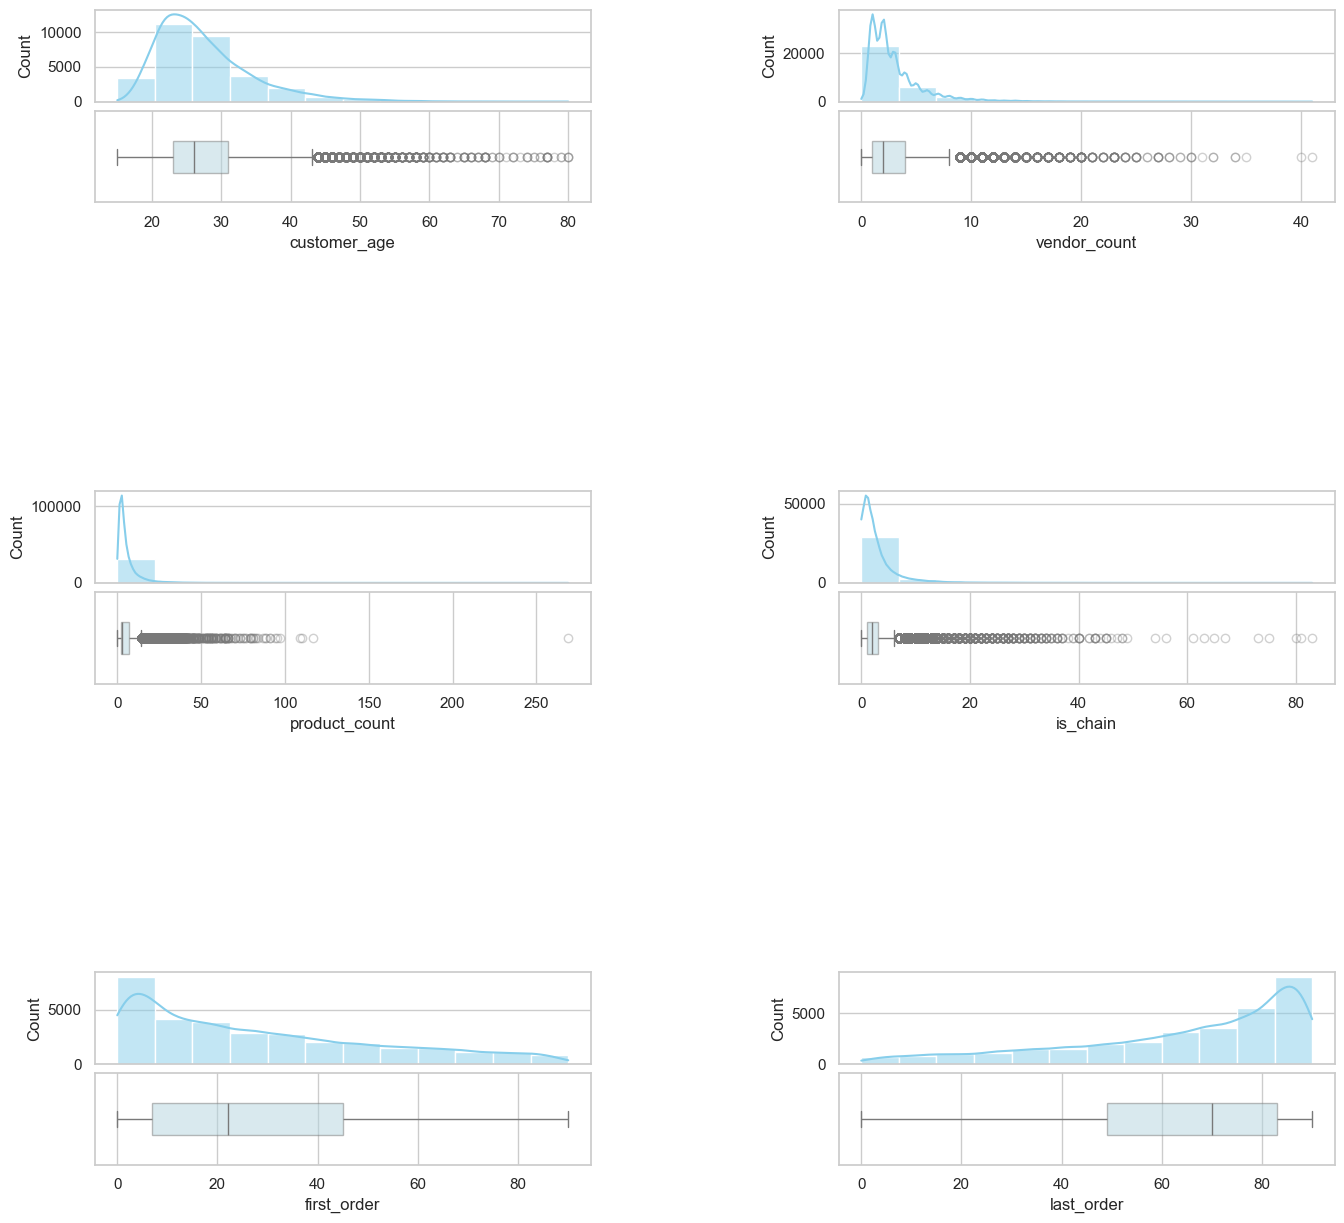

In [11]:
sns.set(style="whitegrid")
numericals = [col for col in df.columns if df[col].dtype != object and df[col].dtype != bool]
subset = [x for x in numericals if x not in hr_cols and x not in CUI_cols and x not in dow_cols]
len(subset)
cols = 2
rows = math.ceil(len(subset) / cols)
fig = plt.figure(figsize=(cols*8, rows*5))
outer = gridspec.GridSpec(rows, cols, wspace=0.5, hspace=1.5)
for i, feature in enumerate(subset):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if j == 0:
            sns.histplot(df[feature], bins=12, kde=True, ax=ax, color="skyblue")
            ax.set_xticks([])
            ax.set_xlabel('')
        else:
            sns.boxplot(x=df[feature], ax=ax, color="lightblue", width=0.35,
                        boxprops=dict(alpha=0.5), flierprops = dict(marker='o', alpha=0.35))
        fig.add_subplot(ax)
fig.show()


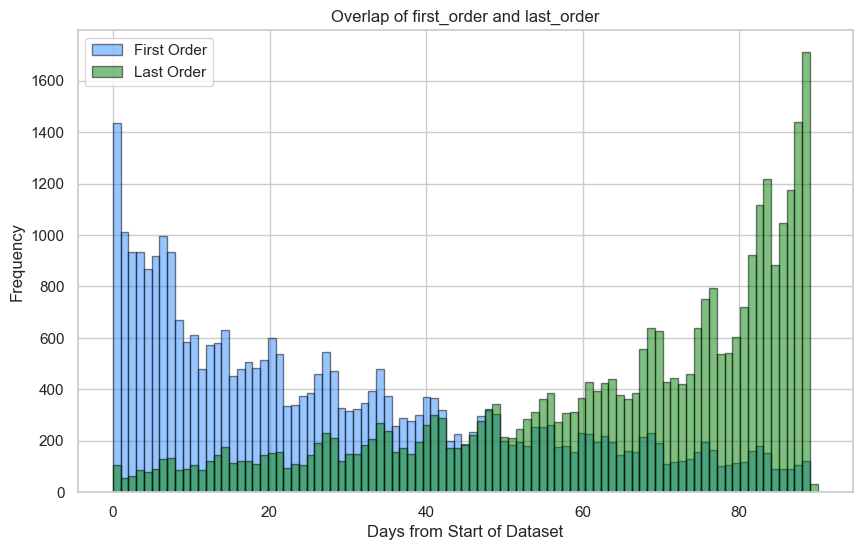

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df.first_order, bins=91, alpha=0.5, label='First Order', color='#308dff', edgecolor='black')
plt.hist(df.last_order, bins=91, alpha=0.5, label='Last Order', color='green', edgecolor='black')
plt.xlabel('Days from Start of Dataset')
plt.ylabel('Frequency')
plt.title('Overlap of first_order and last_order')
plt.legend()
plt.show()

<Axes: >

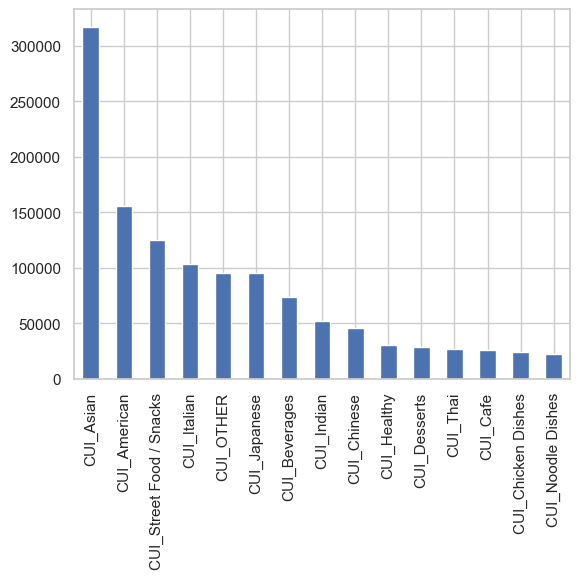

In [13]:
totals = {}
df[CUI_cols].describe().T
for col in CUI_cols:
    totals[col] = df[col].sum()
totals = pd.Series(totals)
totals.sort_values(ascending=False).plot(kind="bar")

In [14]:
cui_totals = df[CUI_cols].sum().sort_values(ascending=False)
cui_percentages = (cui_totals / cui_totals.sum()) * 100
cui_percentages

CUI_Asian                   25.995778
CUI_American                12.735594
CUI_Street Food / Snacks    10.211002
CUI_Italian                  8.446682
CUI_OTHER                    7.836714
CUI_Japanese                 7.823381
CUI_Beverages                6.001235
CUI_Indian                   4.261082
CUI_Chinese                  3.738789
CUI_Healthy                  2.482228
CUI_Desserts                 2.310222
CUI_Thai                     2.198775
CUI_Cafe                     2.092888
CUI_Chicken Dishes           2.006508
CUI_Noodle Dishes            1.859120
dtype: float64

In [15]:
# Apply log transformation and calculate descriptive statistics
#Note that when we want the original value it will be: original = np.exp(log_transformed)-1
for col in CUI_cols:
    log_transformed = np.log(df[col]+1) #+1 to avoid issues like log(0)
    print(f"Log-transformed {col}:\n{log_transformed.describe()}\n")

Log-transformed CUI_American:
count    31875.000000
mean         0.804628
std          1.223081
min          0.000000
25%          0.000000
50%          0.000000
75%          1.896119
max          5.639102
Name: CUI_American, dtype: float64

Log-transformed CUI_Asian:
count    31875.000000
mean         1.081690
std          1.507955
min          0.000000
25%          0.000000
50%          0.000000
75%          2.551786
max          6.799847
Name: CUI_Asian, dtype: float64

Log-transformed CUI_Beverages:
count    31875.000000
mean         0.390114
std          0.928585
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.439035
Name: CUI_Beverages, dtype: float64

Log-transformed CUI_Cafe:
count    31875.000000
mean         0.110773
std          0.550975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.790266
Name: CUI_Cafe, dtype: float64

Log-transformed CUI_Chicken Dishes:
count   

In [16]:
#Calculate the percentage of zeros per cuisine
for col in CUI_cols:
    zero_orders = (df[col] == 0).mean() * 100
    print(f"% of customers who never ordered {col}: {zero_orders:.2f}%")

% of customers who never ordered CUI_American: 66.15%
% of customers who never ordered CUI_Asian: 62.68%
% of customers who never ordered CUI_Beverages: 82.96%
% of customers who never ordered CUI_Cafe: 95.71%
% of customers who never ordered CUI_Chicken Dishes: 89.81%
% of customers who never ordered CUI_Chinese: 88.95%
% of customers who never ordered CUI_Desserts: 93.68%
% of customers who never ordered CUI_Healthy: 93.20%
% of customers who never ordered CUI_Indian: 89.18%
% of customers who never ordered CUI_Italian: 79.77%
% of customers who never ordered CUI_Japanese: 80.24%
% of customers who never ordered CUI_Noodle Dishes: 93.02%
% of customers who never ordered CUI_OTHER: 77.91%
% of customers who never ordered CUI_Street Food / Snacks: 86.69%
% of customers who never ordered CUI_Thai: 92.54%


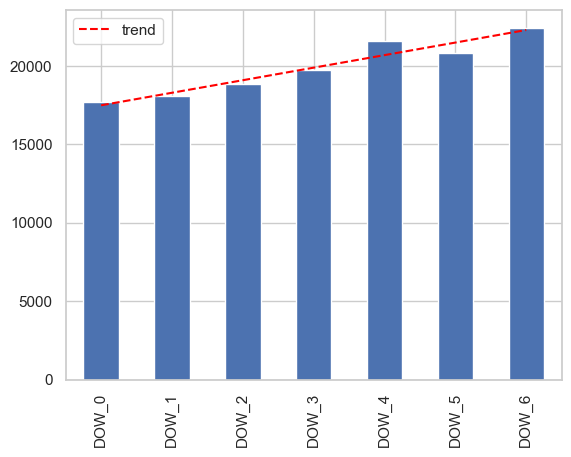

In [17]:
dof = {}
for col in dow_cols:
    dof[col] = df[col].sum()
dof = pd.Series(dof)
x = np.arange(len(dof))
y = dof.values
m, b = np.polyfit(x, y, 1) # linear regression; m = slope; b = intercept
dof.plot(kind="bar")
plt.plot(x, m*x + b, color="red", linestyle="--", label="trend")
plt.legend()

<Axes: >

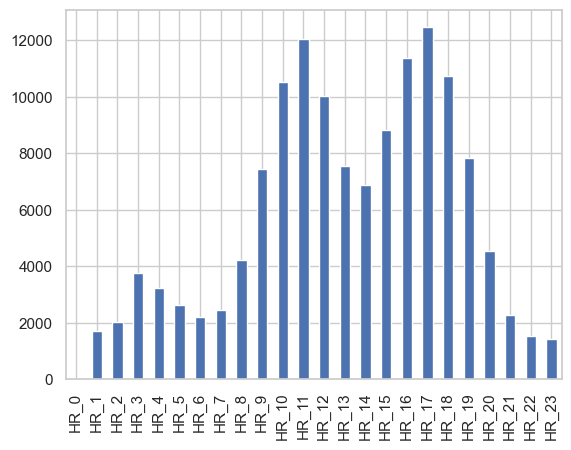

In [18]:
hours = {}
hr_cols = [col for col in df.columns if "HR" in col]
df[hr_cols].describe().T
for col in hr_cols:
    hours[col] = df[col].sum()
hours = pd.Series(hours)
hours.plot(kind="bar")

<h3 id='categorical'>2.2 Categorical variables</h3>

In [19]:
df.describe(include="object").T

count unique         top   freq
customer_id      31875  31875  1b8f824d5e      1
customer_region  31875      9        8670   9761
last_promo       31875      4           -  16744
payment_method   31875      3        CARD  20153

In [20]:
df.set_index("customer_id", inplace=True)

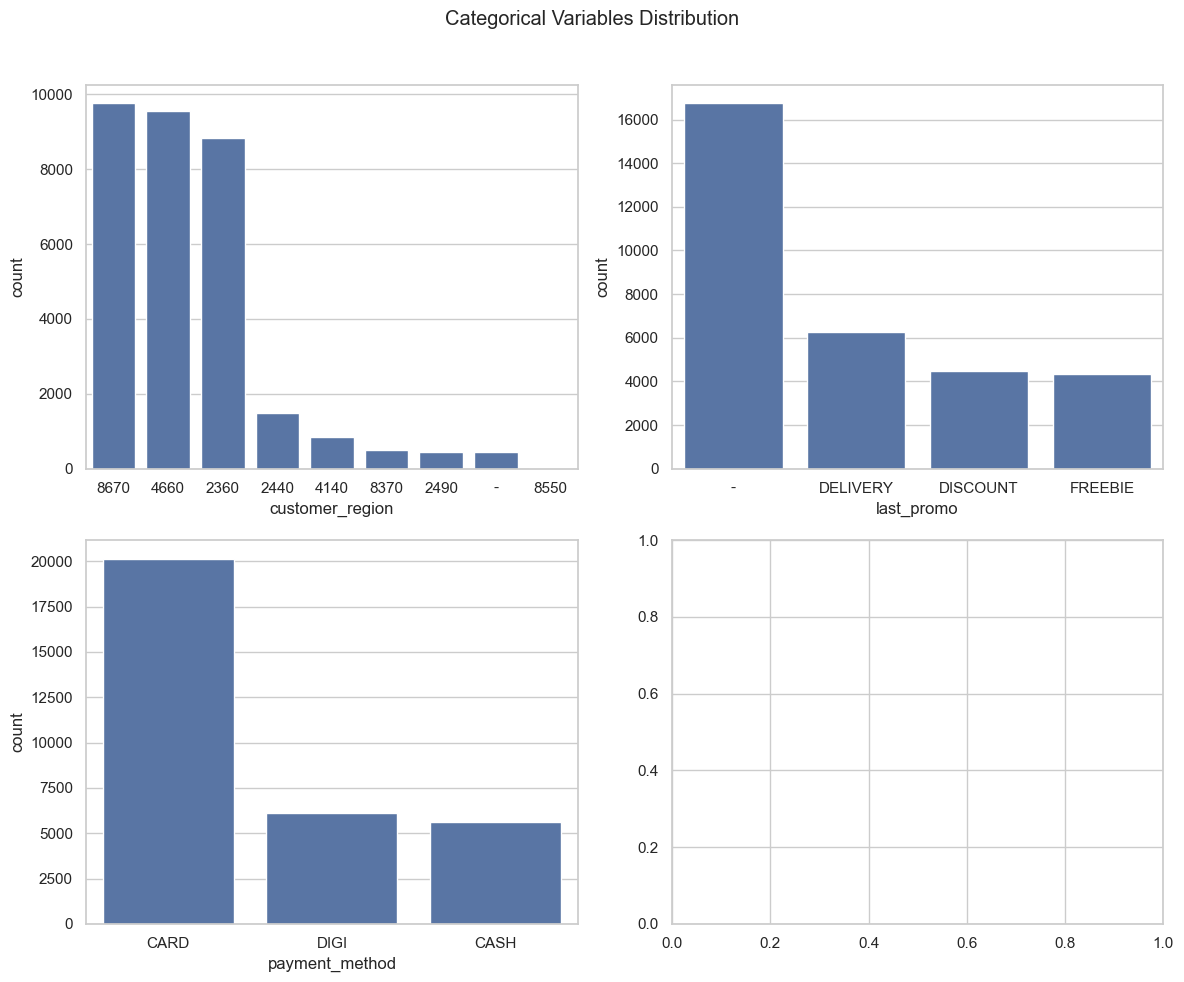

In [21]:
cat_cols = [col for col in df.columns if df[col].dtype == object or df[col].dtype == bool]

cols = 2
rows = math.ceil(len(cat_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
for ax, feat in zip(axes.flatten(), cat_cols):
    order = df[feat].value_counts().index
    sns.countplot(x=feat, data=df, ax=ax, order=order)
plt.suptitle("Categorical Variables Distribution")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [22]:
#Percentage for payment method
df['payment_method'].value_counts(normalize=True) * 100

payment_method
CARD    63.225098
DIGI    19.130980
CASH    17.643922
Name: proportion, dtype: float64

In [ ]:
#Calculate the number and percentages of customer region
region_counts = df['customer_region'].value_counts()

region_percentages = df['customer_region'].value_counts(normalize=True) * 100

region_summary = pd.DataFrame({
    'Count': region_counts,
    'Percentage': region_percentages
})
region_summary['Percentage'] = region_summary['Percentage'].round(2)
region_summary

Count  Percentage
customer_region                   
8670              9761       30.61
4660              9550       29.95
2360              8829       27.69
2440              1483        4.65
4140               857        2.69
8370               495        1.55
2490               445        1.40
-                  442        1.39
8550                26        0.08

> There

<h2 id='data-preprocessing'>3. Data preprocessing</h2>

<h3 id='feature-engineering'>3.1 Feature engineering</h3>

<h4 id='numerical-new'> 3.1.1 Numerical new features</h4>

In [23]:
df["total_orders"] = df[dow_cols].apply(lambda x: x.sum(), axis=1)
df["percentage_chain"] = np.where(df.product_count == 0, 0, df.is_chain / df.total_orders * 100)
df["customer_lifetime"] = df.last_order - df.first_order
df["order_freq"] = np.where(df.customer_lifetime== 0, 0, df.total_orders / (df.customer_lifetime / 7))
df["avg_time_between_orders"] = np.where(df.total_orders == 0, 0, df.customer_lifetime / df.total_orders)
df["total_spent"] = df[CUI_cols].apply(lambda x: x.sum(), axis=1)
df["total_spent_log"] = np.where(df.total_spent == 0, np.nan, np.log(df.total_spent))
df["avg_order_value"] = np.where(df.total_orders == 0, 0, df.total_spent / df.total_orders)

In [24]:
new_numerical_cols = list(df.columns)[-8:]
df[new_numerical_cols].describe().T

count       mean        std       min        25%  \
total_orders             31875.0   4.369035   5.084780  0.000000   2.000000   
percentage_chain         31875.0  62.418455  38.843949  0.000000  33.333333   
customer_lifetime        31769.0  35.414901  29.415668  0.000000   3.000000   
order_freq               31769.0   0.981015   1.824298  0.000000   0.245614   
avg_time_between_orders  31769.0   8.468518   7.891030  0.000000   1.333333   
total_spent              31875.0  38.295857  46.410657  0.000000  12.880000   
total_spent_log          31737.0   3.188463   0.967458 -0.994252   2.566487   
avg_order_value          31875.0  10.261374   7.874293  0.000000   5.030000   

                               50%         75%          max  
total_orders              3.000000    5.000000    94.000000  
percentage_chain         71.428571  100.000000   100.000000  
customer_lifetime        34.000000   62.000000    90.000000  
order_freq                0.583333    1.042553    28.000000  
avg_time_between_orders   7.111111   12.666667    44.500000  
total_spent              24.140000   44.970000  1418.330000  
total_spent_log           3.186353    3.810655     7.257235  
avg_order_value           8.183000   12.890000   104.320000

In [25]:
# drop the 138 cases with 0 orders
df = df[df["total_orders"] > 0]

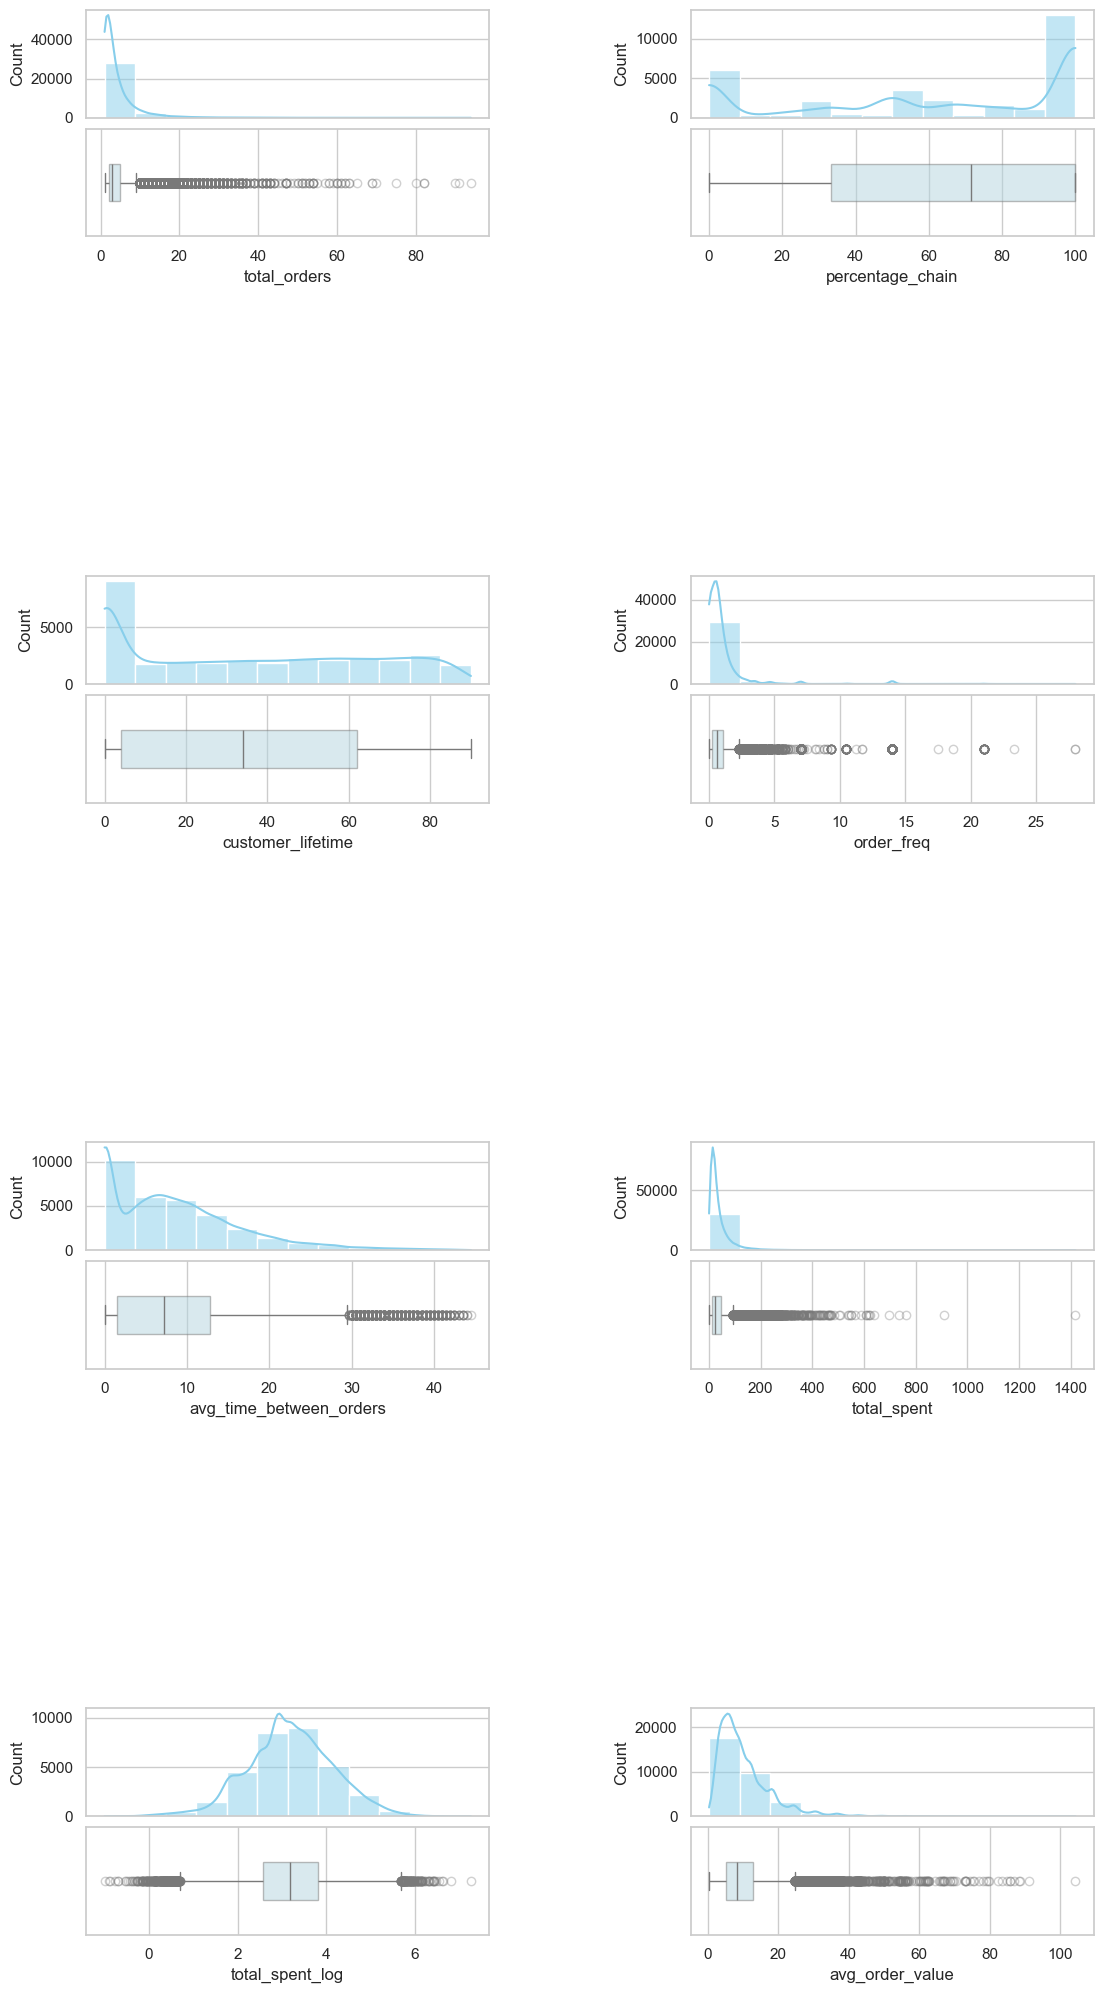

In [26]:
sns.set(style="whitegrid")
numericals = [col for col in df.columns if df[col].dtype != object and df[col].dtype != bool]
subset = numericals[-8:]
len(subset)
cols = 2
rows = math.ceil(len(subset) / cols)
fig = plt.figure(figsize=(13, 25))
outer = gridspec.GridSpec(rows, cols, wspace=0.5, hspace=1.5)
for i, feature in enumerate(subset):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if j == 0:
            sns.histplot(df[feature], bins=12, kde=True, ax=ax, color="skyblue")
            ax.set_xticks([])
            ax.set_xlabel('')
        else:
            sns.boxplot(x=df[feature], ax=ax, color="lightblue", width=0.35,
                        boxprops=dict(alpha=0.5), flierprops = dict(marker='o', alpha=0.35))
        fig.add_subplot(ax)
fig.show()

In [27]:
for col in CUI_cols:
    df[col+"_log"] = df[col].apply(lambda x: np.log(x) if x > 0 else np.nan)

df.columns
CUI_log_cols = [col for col in df.columns if "CUI" in col and "log" in col]
CUI_log_cols

['CUI_American_log',
 'CUI_Asian_log',
 'CUI_Beverages_log',
 'CUI_Cafe_log',
 'CUI_Chicken Dishes_log',
 'CUI_Chinese_log',
 'CUI_Desserts_log',
 'CUI_Healthy_log',
 'CUI_Indian_log',
 'CUI_Italian_log',
 'CUI_Japanese_log',
 'CUI_Noodle Dishes_log',
 'CUI_OTHER_log',
 'CUI_Street Food / Snacks_log',
 'CUI_Thai_log']

In [28]:
#Percentage of customers with lifetime=0
(df['customer_lifetime']==0).sum()/df.shape[0]

0.22210668935312097

In [29]:
# % of customers with avg_time_between_order>30
(df["avg_time_between_orders"]>30).sum()/df.shape[0]

0.01836972618710023

<h4 id='categorical-new'> 3.1.2 Categorical new features</h4>

In [30]:
df["last_promo"] = np.where(df.last_promo == "-", "No promo", df.last_promo)
df["promo_used"] = df.last_promo.apply(lambda x: False if x == "No promo" else True)
df["favorite_cuisine"] = df[CUI_cols].idxmax(axis=1).apply(lambda x: x.split("_")[1])
df["active_customer"] = np.where((df.last_order >= 60), True, False)
df["recent_customer"] = np.where((df.first_order >= 60), True, False)
df["churning_customer"] = np.where((df.last_order < 60), True, False)
df["customer_activity"] = np.where((df.churning_customer == True), "Churning",
                                   np.where((df.recent_customer == True), "Recent", "Active"))
df.drop(columns=["active_customer", "recent_customer", "churning_customer"], inplace=True)
df["most_freq_day"] = df[dow_cols].idxmax(axis=1).apply(lambda x: x.split("_")[1])
df["most_freq_day"] = df["most_freq_day"].replace({"0": "Sun", "1":
    "Mon", "2": "Tue", "3": "Wed", "4": "Thu", "5": "Fri", "6": "Sat"})
df["most_freq_hour"] = df[hr_cols].idxmax(axis=1).apply(lambda x: x.split("_")[1])


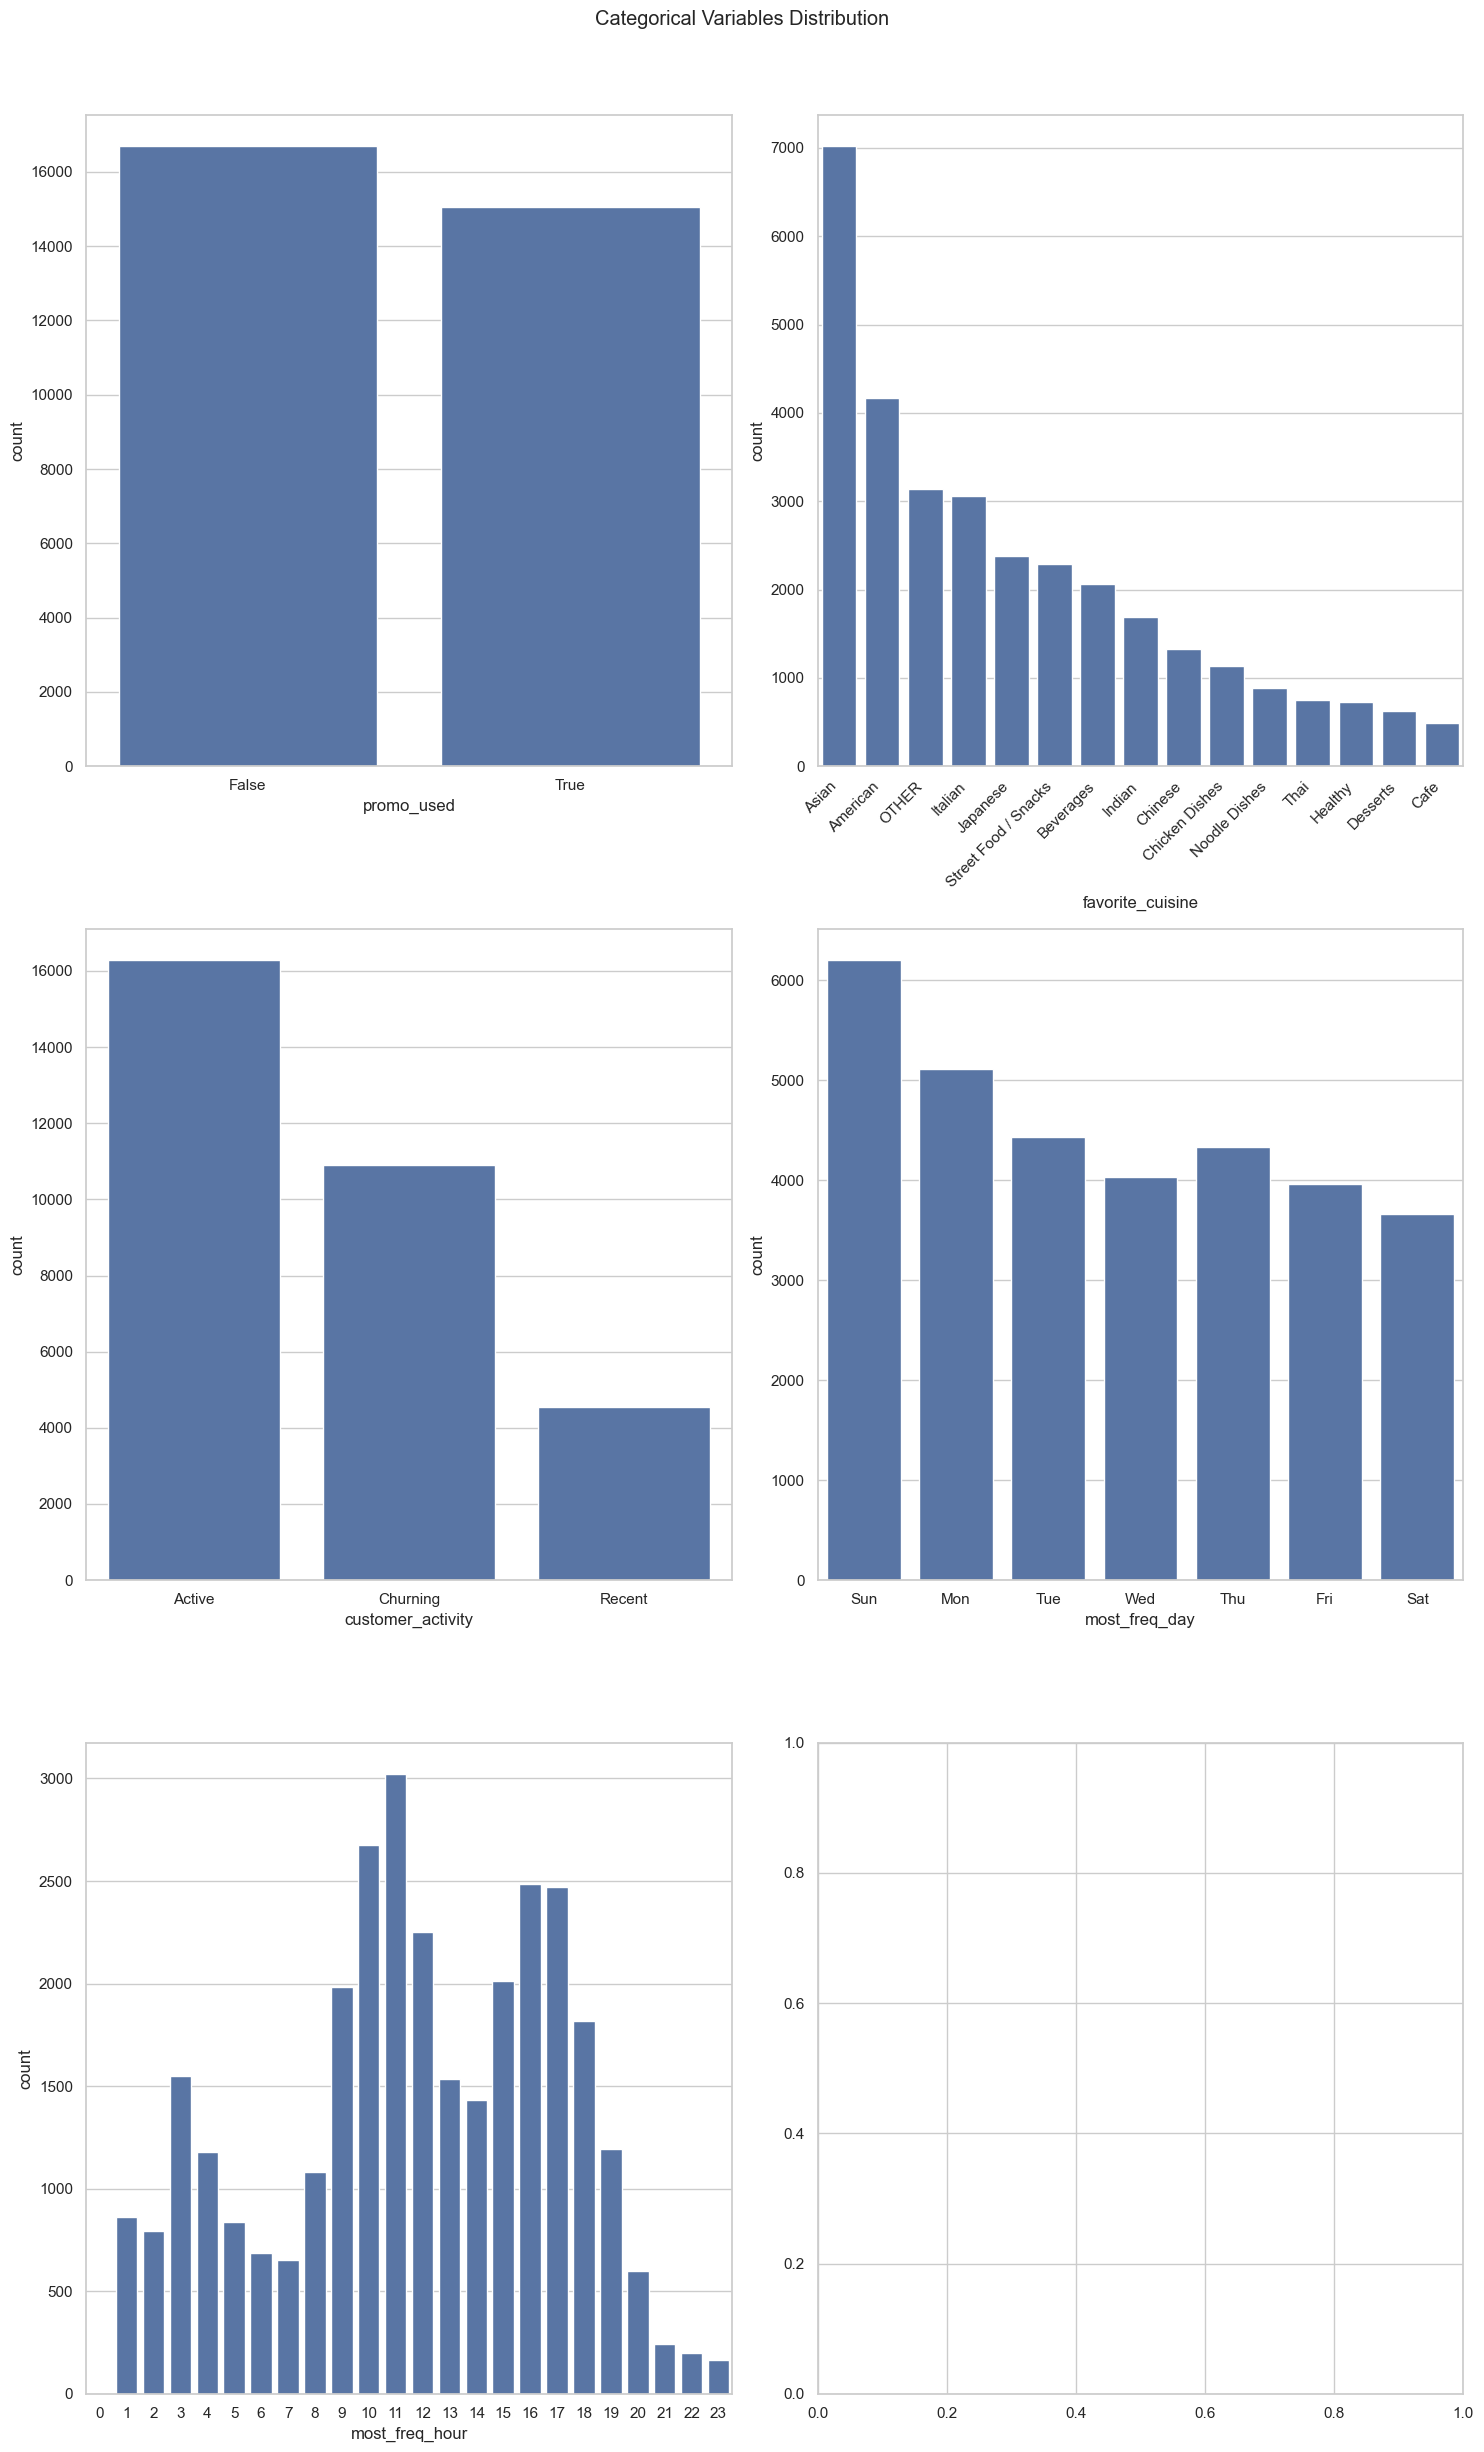

In [31]:
sns.set(style="whitegrid")
cat_cols = [col for col in df.columns if df[col].dtype == object or df[col].dtype == bool]
subset = cat_cols[-5:]
cols = 2
rows = math.ceil(len(subset) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, 25))
for ax, feat in zip(axes.flatten(), subset):
    if feat == "most_freq_hour":
        order = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
                 "11", "12", "13", "14", "15", "16", "17", "18",
                 "19", "20", "21", "22", "23"]
    elif feat == "most_freq_day":
        order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    else:
        order = df[feat].value_counts().index
    sns.countplot(x=feat, data=df, ax=ax, order=order)
    if feat == "favorite_cuisine":
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
title = "Categorical Variables Distribution"
plt.suptitle(title)
plt.tight_layout(rect=[0, 0, 1, 0.96])

In [32]:
# Calculate the percentage of each day in the 'favorite_day' variable
favorite_day_percentage = (df['most_freq_day'].value_counts(normalize=True) * 100).round(0)

# Display the percentages
print(favorite_day_percentage)

# Calculate the percentage of each hour in the 'favorite_hour' variable
favorite_hour_percentage = (df['most_freq_hour'].value_counts(normalize=True) * 100).sort_index().round(0)

# Display the percentages
print(favorite_hour_percentage)

most_freq_day
Sun    20.0
Mon    16.0
Tue    14.0
Thu    14.0
Wed    13.0
Fri    12.0
Sat    12.0
Name: proportion, dtype: float64
most_freq_hour
1      3.0
10     8.0
11    10.0
12     7.0
13     5.0
14     5.0
15     6.0
16     8.0
17     8.0
18     6.0
19     4.0
2      2.0
20     2.0
21     1.0
22     1.0
23     1.0
3      5.0
4      4.0
5      3.0
6      2.0
7      2.0
8      3.0
9      6.0
Name: proportion, dtype: float64


<h3 id='impute-missing'> 3.2 Imputation of missing values</h3>

<code>first_order:</code>

In [33]:
df[df.first_order.isna()].total_orders.value_counts()

total_orders
1    104
2      2
Name: count, dtype: int64

In [34]:
df[(df.total_orders == 1) & (df.first_order > 1)][["first_order", "last_order", "total_orders"]]

first_order  last_order  total_orders
customer_id                                       
0738418791           2.0           2             1
0a1d8d4064           2.0           2             1
0ada87726c           2.0           2             1
0c9f55a479           2.0           2             1
19d4e9eac1           2.0           2             1
...                  ...         ...           ...
eb13c834e7          89.0          89             1
f7be3a1a84          89.0          89             1
fc924e1758          89.0          89             1
fcdbf7468b          89.0          89             1
d7c7face7e          90.0          90             1

[6753 rows x 3 columns]

The cases were first order were missing; majority had total orders of 1 or 2. Probably these orders were made in the same day as the last day so we can impute de missing first order with the last order value.

In [35]:
df["first_order"] = np.where(df.first_order.isna(), df.last_order, df.first_order)
df.first_order.isna().sum()

0

<code>HR_0:</code>

In [36]:
df["HR_0"].isna().sum()

1164

In [37]:
df["total_hours"] = df[hr_cols].apply(lambda x: x.sum(), axis=1)
df["total_days"] = df[dow_cols].apply(lambda x: x.sum(), axis=1)
df.total_days.corr(df.total_hours)

0.9981101262472291

In [38]:
df["HR_0"] = np.where(df.HR_0.isna(), df.total_days - df.total_hours, df.HR_0)
df.drop(columns=["total_hours", "total_days"], inplace=True)
df.HR_0.isna().sum()

0



```
# This is formatted as code
```

<code>Customer_age and Customer_region:</code>

In [39]:
indexes = df[df["customer_region"] == "-"].index

In [40]:
df["customer_region"] = df["customer_region"].replace({"-": np.nan})
df.customer_region.isna().sum()


442

In [41]:
df.customer_age.isna().sum()

727

In [42]:
label_encoder = LabelEncoder()
df.loc[df["customer_region"].notna(), "customer_region"] = label_encoder.fit_transform(df.loc[df["customer_region"].notna(), "customer_region"])
df["customer_region"].unique()

array([0, 7, 4, 1, nan, 3, 2, 5, 6], dtype=object)

In [43]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'2360': 0,
 '2440': 1,
 '2490': 2,
 '4140': 3,
 '4660': 4,
 '8370': 5,
 '8550': 6,
 '8670': 7}

In [44]:
num_cols = [col for col in df.columns if df[col].dtype != object and df[col].dtype != bool]
num_cols = [col for col in num_cols if col not in CUI_log_cols]
num_cols.remove("total_spent_log")

num_cols.append("customer_region")

scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [45]:
imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])
df.isna().sum()

customer_region      0
customer_age         0
vendor_count         0
product_count        0
is_chain             0
                    ..
promo_used           0
favorite_cuisine     0
customer_activity    0
most_freq_day        0
most_freq_hour       0
Length: 83, dtype: int64

In [46]:
df.customer_region.unique()

array([-0.57142857,  0.42857143,  0.        , -0.42857143, -0.14285714,
       -0.28571429,  0.37142857,  0.25714286,  0.34285714,  0.14285714,
        0.28571429, -0.02857143,  0.37142857,  0.02857143,  0.17142857,
        0.08571429,  0.22857143, -0.17142857, -0.11428571,  0.05714286,
        0.17142857, -0.05714286,  0.31428571,  0.02857143,  0.4       ,
        0.2       , -0.25714286,  0.02857143, -0.05714286, -0.34285714,
       -0.17142857])

In [47]:
df[num_cols] = scaler.inverse_transform(df[num_cols])
df.customer_region.unique()

array([0. , 7. , 4. , 1. , 3. , 2. , 6.6, 5.8, 6.4, 5. , 6. , 3.8, 4.2,
       5.2, 4.6, 5.6, 2.8, 3.2, 4.4, 5.2, 3.6, 6.2, 6.8, 5.4, 2.2, 1.6,
       2.8])

In [48]:
df["customer_region"] = df["customer_region"].round().astype(int)

label_map_invert = {value: key for key, value in label_mapping.items()}

df["customer_region"] = df["customer_region"].replace(label_map_invert)

df.loc[indexes, "customer_region"].value_counts(normalize=True)

customer_region
8670    0.662896
8550    0.201357
4660    0.058824
8370    0.049774
4140    0.022624
2490    0.004525
Name: proportion, dtype: float64

<h3 id='outlier-removal'> 3.3 Outliers removal</h3>

In [49]:
filters_man = (
    (df['customer_age']<=55)
    &
    (df['vendor_count']<=25)
    &
    (df['product_count']<=50)
    &
    (df['is_chain'] <= 30)
    &
    (df['total_orders']<=40)
    &
    (df["order_freq"] <= 8)
    &
    (df['avg_time_between_orders']<=40)
    &
    (df["avg_order_value"] <=70)
    &
    (df['total_spent']<=300))

df_man = df[filters_man]

df_man.shape[0] / df.shape[0] * 100

97.29968175946057

In [50]:
df.shape[0] - df_man.shape[0]

857

In [51]:
df = df[(filters_man)]

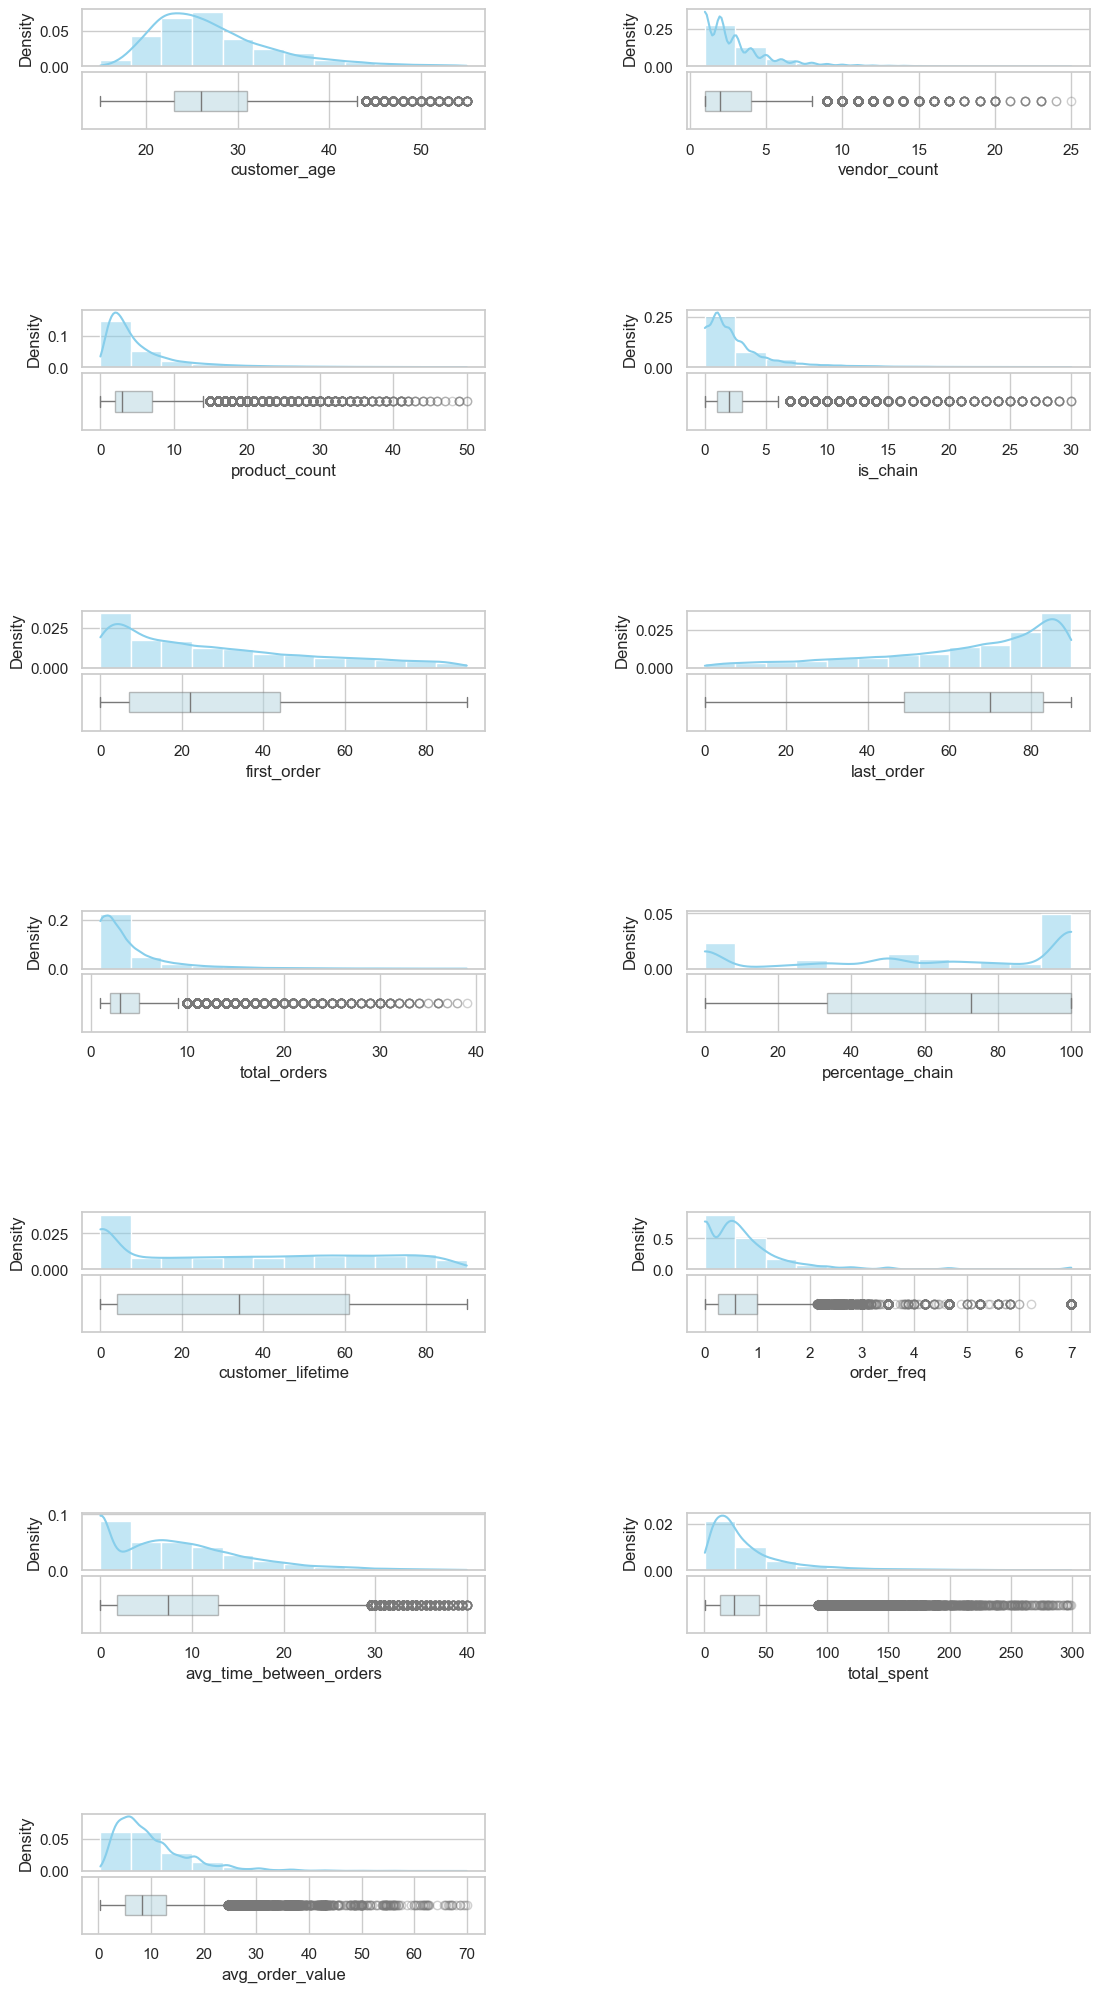

In [52]:
num_cols = [col for col in df.columns if df[col].dtype != object and df[col].dtype != bool]
num_cols = [col for col in num_cols if col not in CUI_log_cols]
num_cols.remove("total_spent_log")
num_cols = [col for col in num_cols if col not in hr_cols and col not in dow_cols and col not in CUI_cols]

sns.set(style="whitegrid")
len(subset)
cols = 2
rows = math.ceil(len(num_cols) / cols)
fig = plt.figure(figsize=(13, 25))
outer = gridspec.GridSpec(rows, cols, wspace=0.5, hspace=1.5)
for i, feature in enumerate(num_cols):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if j == 0:
            sns.histplot(df[feature], bins=12, kde=True, ax=ax, color="skyblue", stat="density")
            ax.set_xticks([])
            ax.set_xlabel('')
        else:
            sns.boxplot(x=df[feature], ax=ax, color="lightblue", width=0.35,
                        boxprops=dict(alpha=0.5), flierprops = dict(marker='o', alpha=0.35))
        fig.add_subplot(ax)
fig.show()

<h2 id='multivariate'>4. Multivariate analysis</h2>

<h3 id='numerical-numerical'>4.1 Numericals vs. Numericals</h3>

<h4>Correlation matrix</h4>

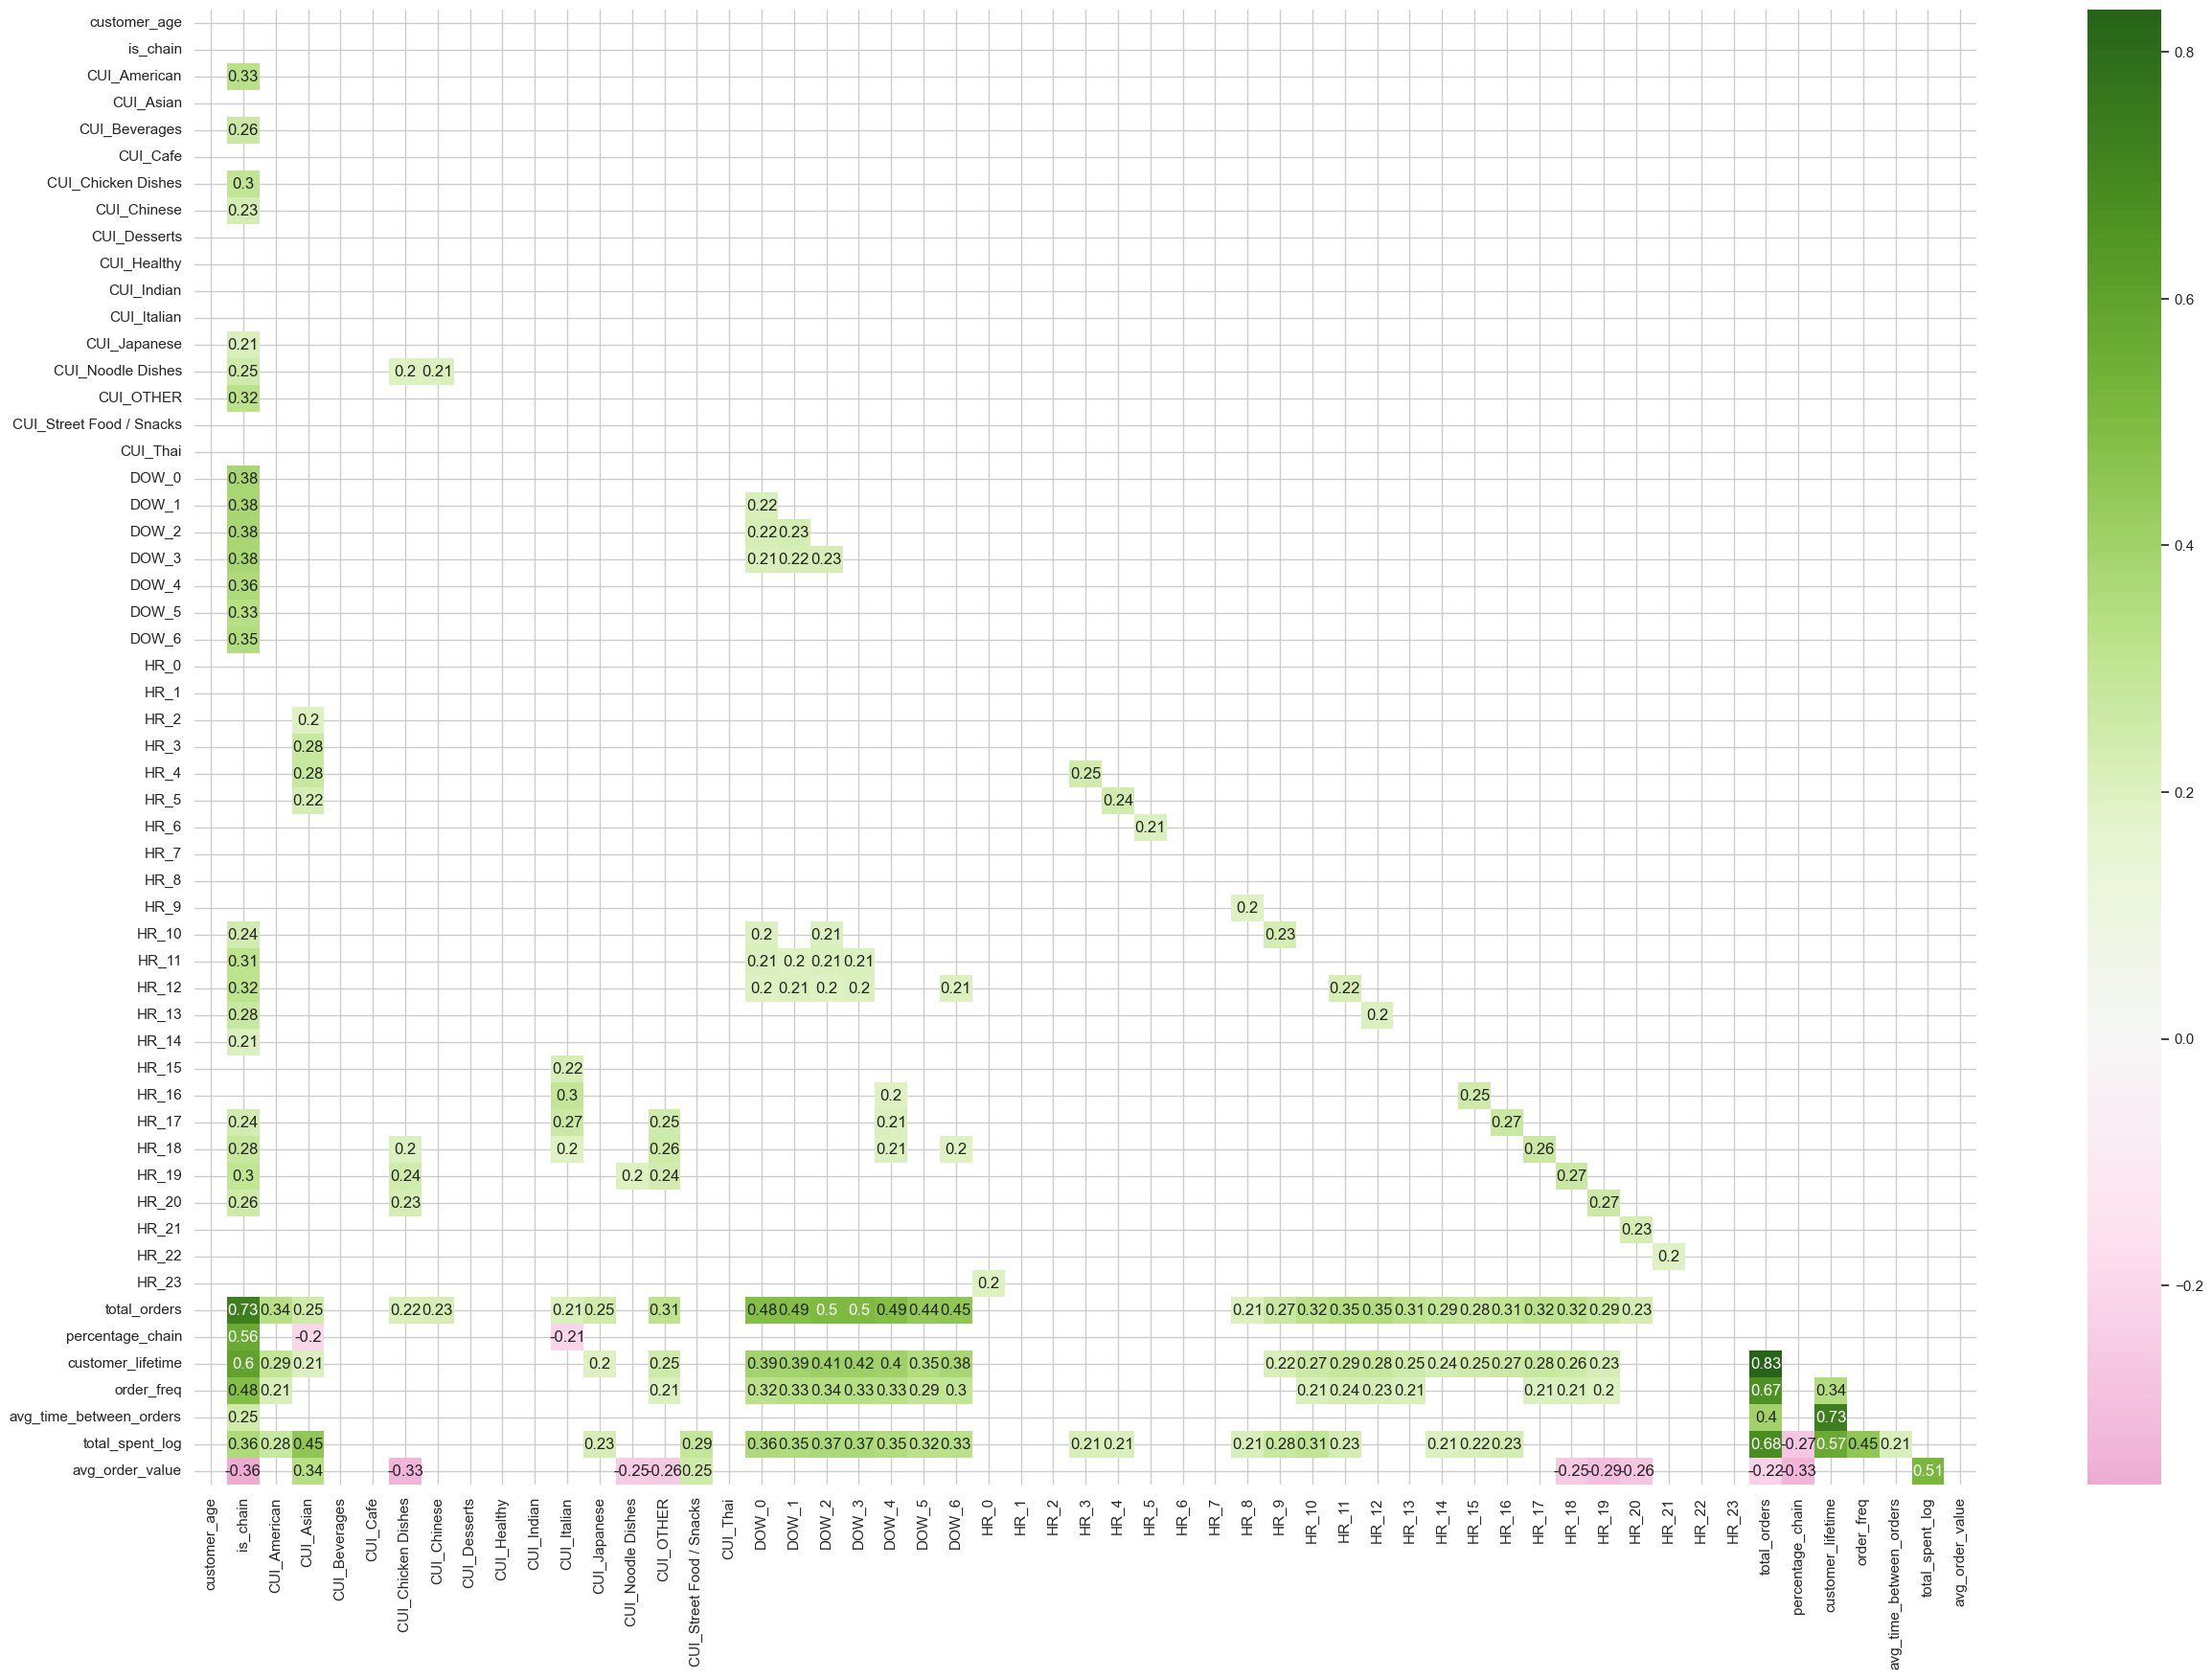

In [53]:
numericals = [col for col in df.columns if df[col].dtype != object and df[col].dtype != bool]
numericals.remove("last_order")
numericals.remove("first_order")
numericals.remove("total_spent")

subset = [x for x in numericals if x not in CUI_log_cols]
subset.remove("product_count")
subset.remove("vendor_count")
corr = df[subset].corr(method='spearman')
lower_triangle_mask = np.triu(np.ones(corr.shape)).astype(bool)
cor_mat_lower = corr.mask(lower_triangle_mask)
plt.figure(figsize = (30,20))
sns.heatmap(cor_mat_lower[(abs(cor_mat_lower) >= 0.2)],
            annot=True,
            cmap='PiYG',
            center=0);

In [54]:
df.drop(columns=["is_chain"], inplace=True)
numericals.remove("is_chain")

<Axes: >

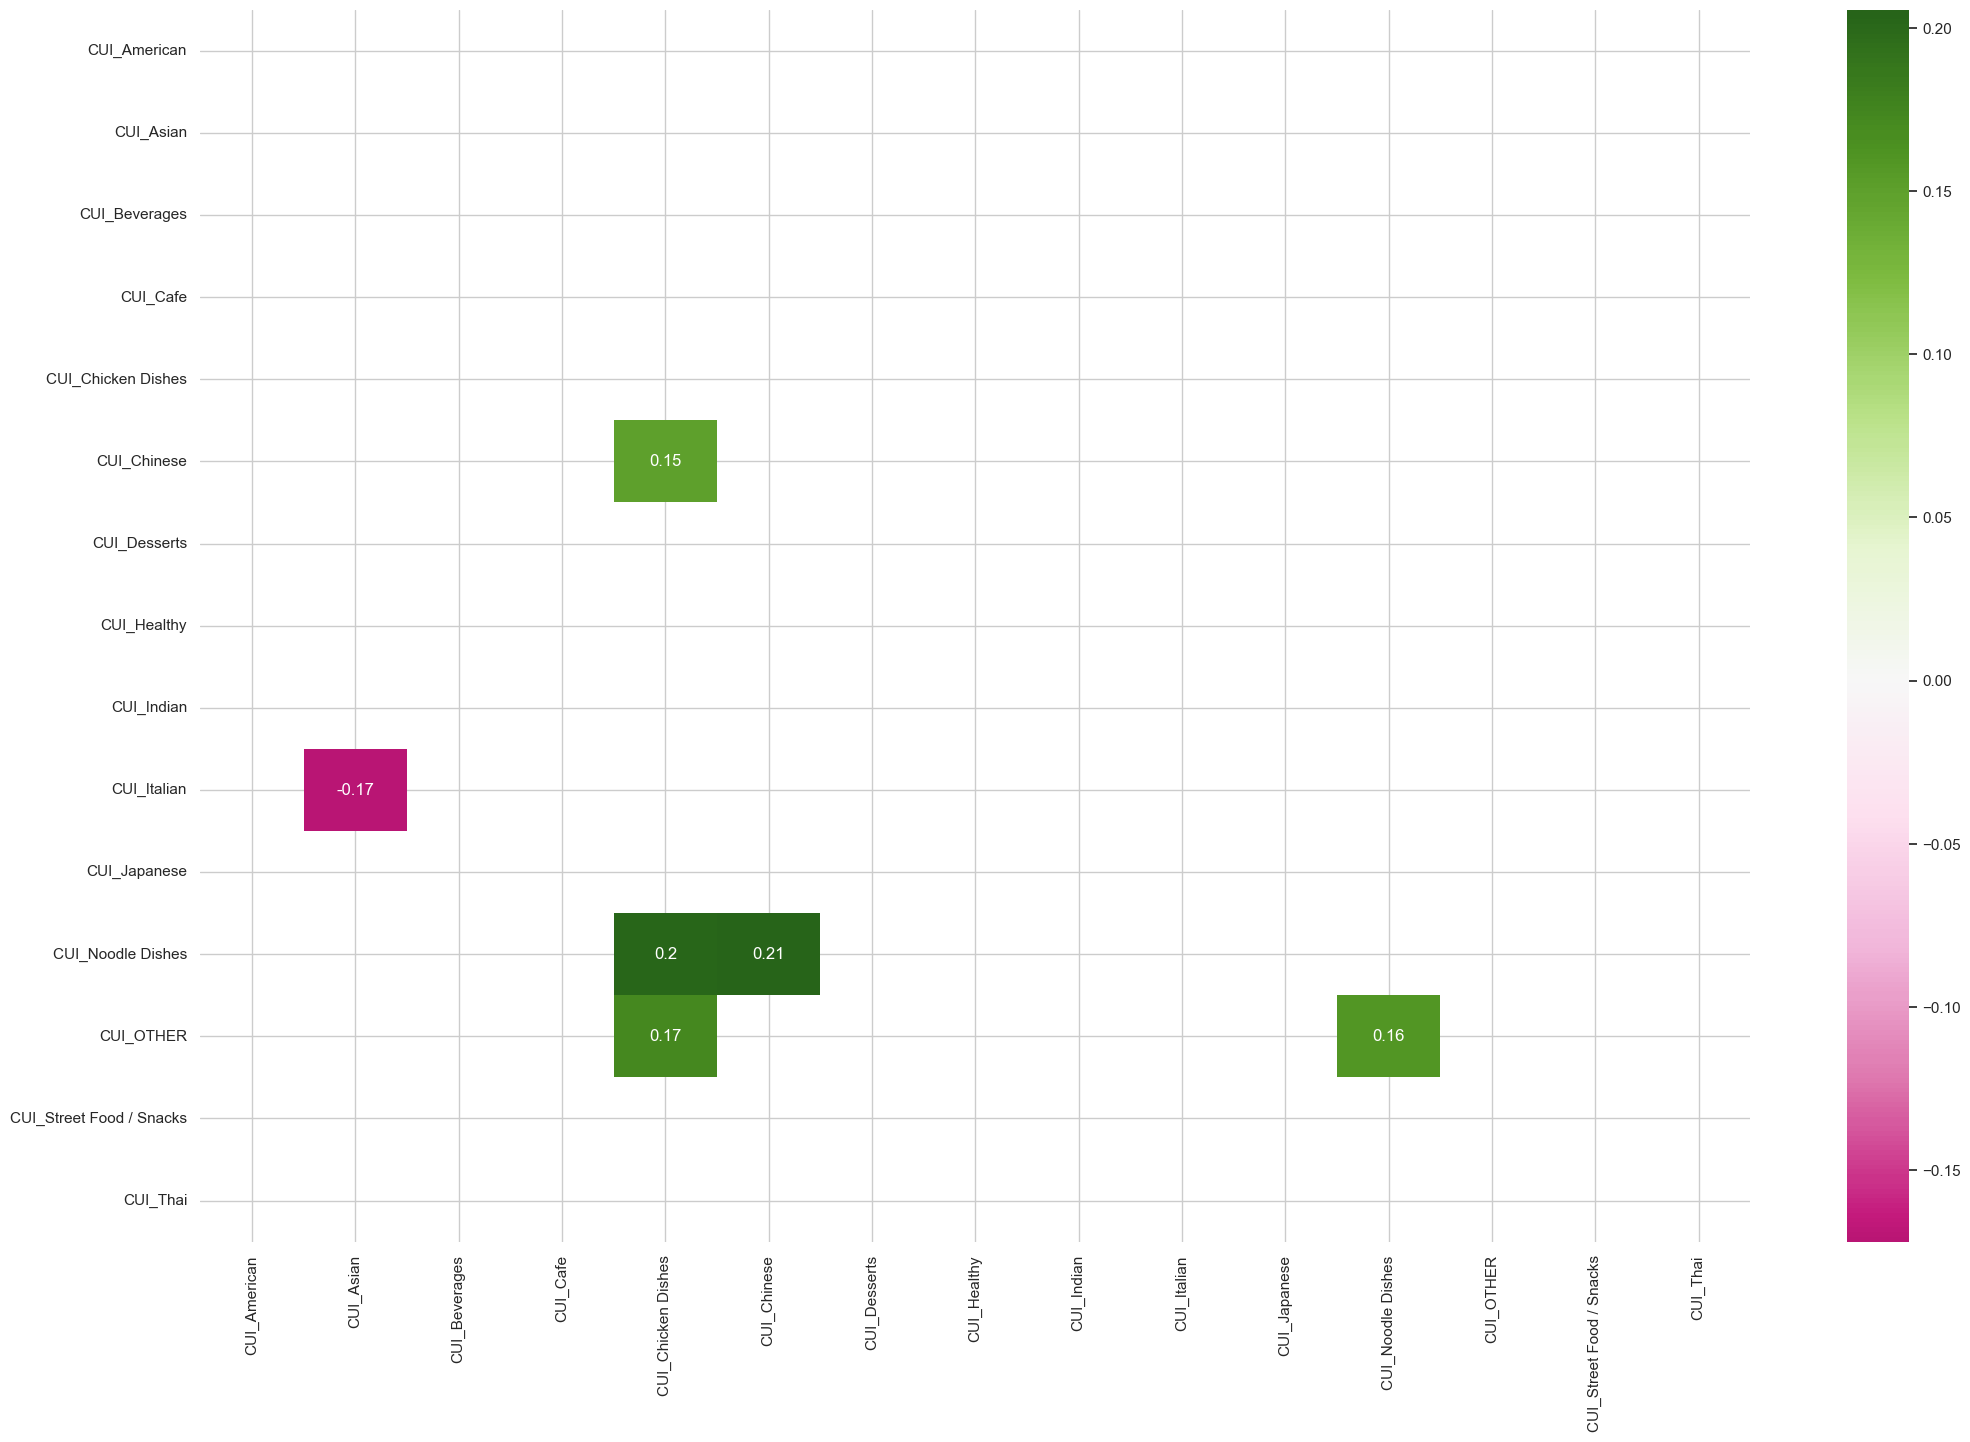

In [55]:
corr = df[CUI_cols].corr(method='spearman')
lower_triangle_mask = np.triu(np.ones(corr.shape)).astype(bool)
cor_mat_lower = corr.mask(lower_triangle_mask)
plt.figure(figsize = (25,16))
sns.heatmap(cor_mat_lower[abs(cor_mat_lower) > 0.15],
            annot=True, cmap='PiYG',
            center=0)
            #cmap='RdBu_r');
# corr chine e noodle
# corr entre cafe e other

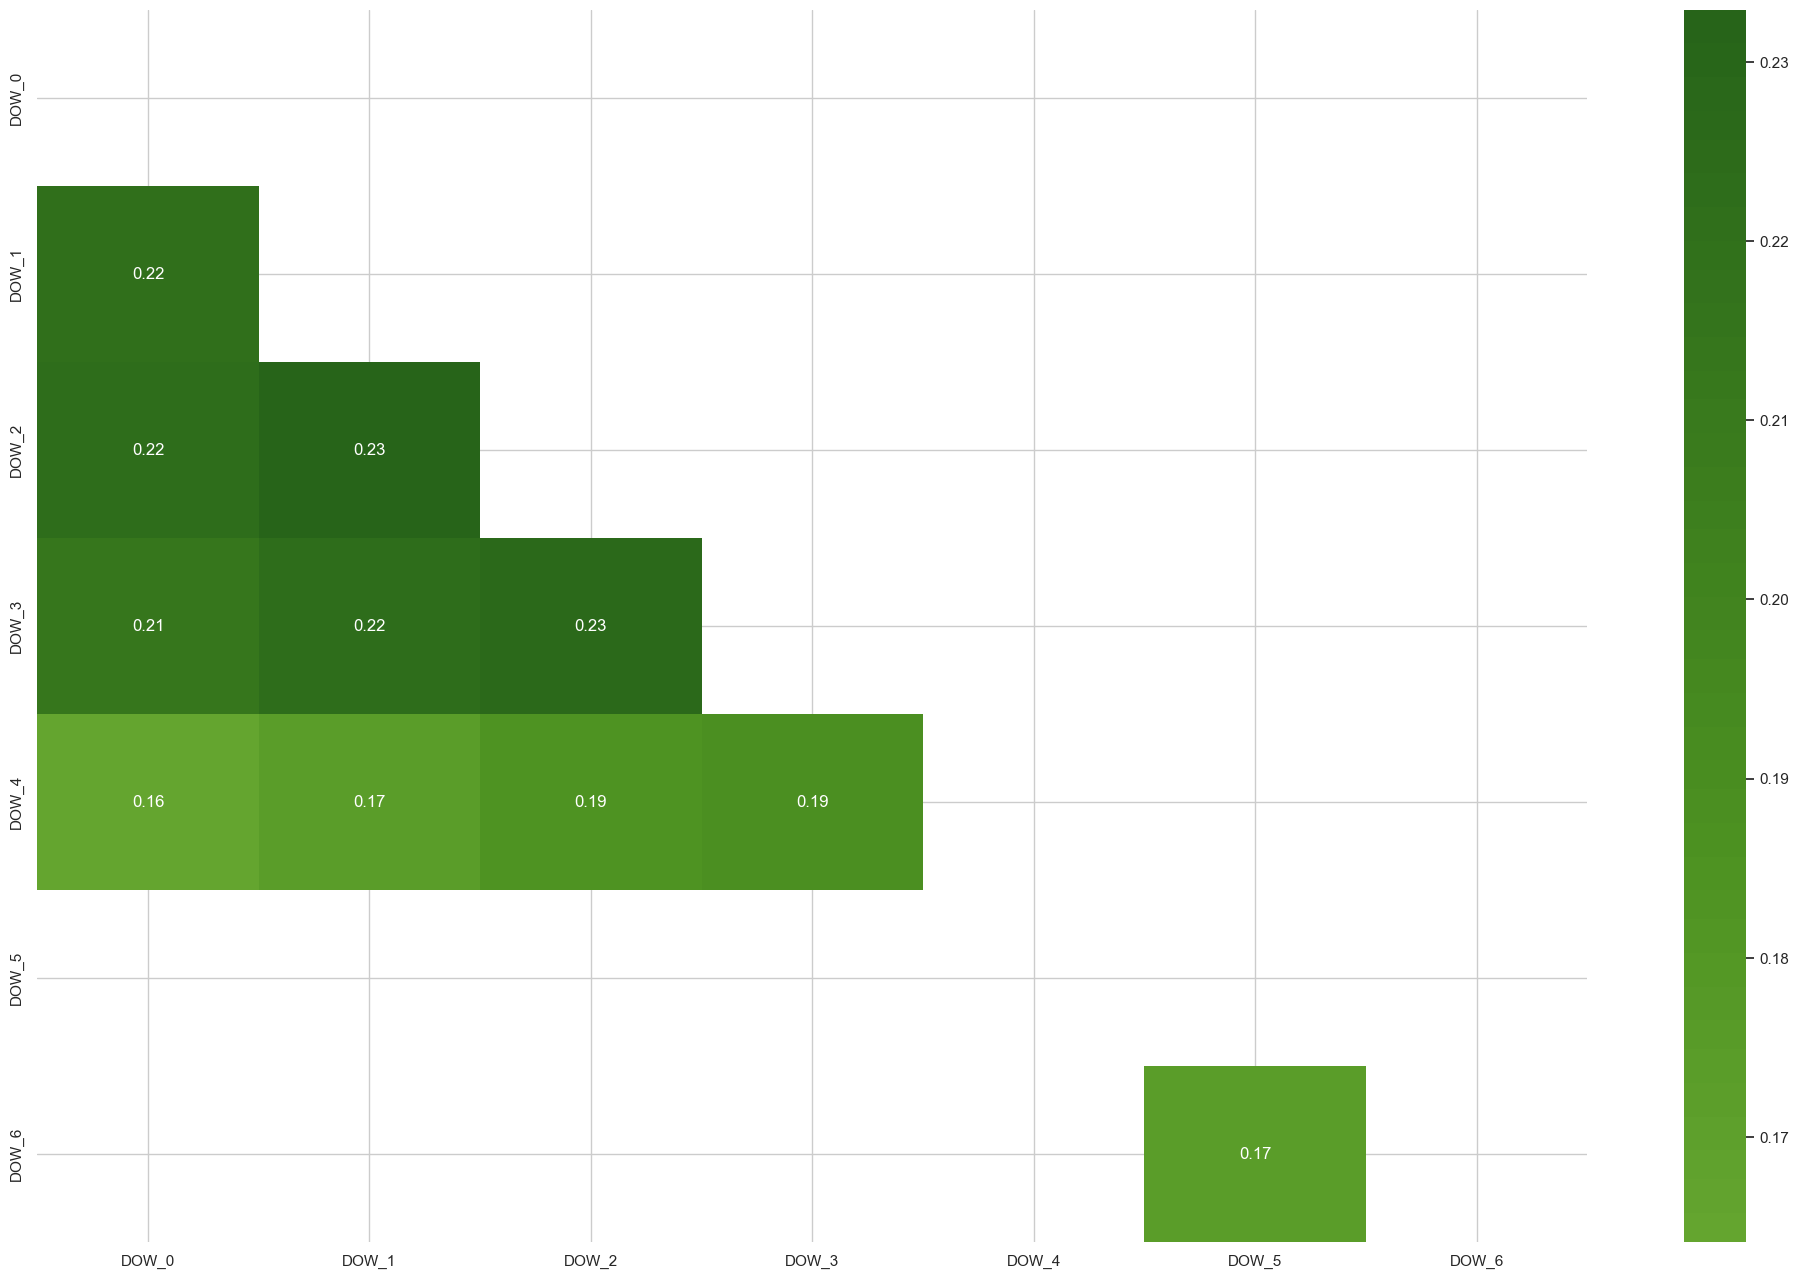

In [56]:
# corr entre dias
corr = df[dow_cols].corr(method='spearman')
lower_triangle_mask = np.triu(np.ones(corr.shape)).astype(bool)
cor_mat_lower = corr.mask(lower_triangle_mask)
plt.figure(figsize = (25,16))
sns.heatmap(cor_mat_lower[abs(cor_mat_lower) > 0.15],
            annot=True,
            cmap='PiYG',
            center=0);
# correlacao ligeiramente maior se comprar no domingo compra na segunda
# se comprar na segunda compra na terca

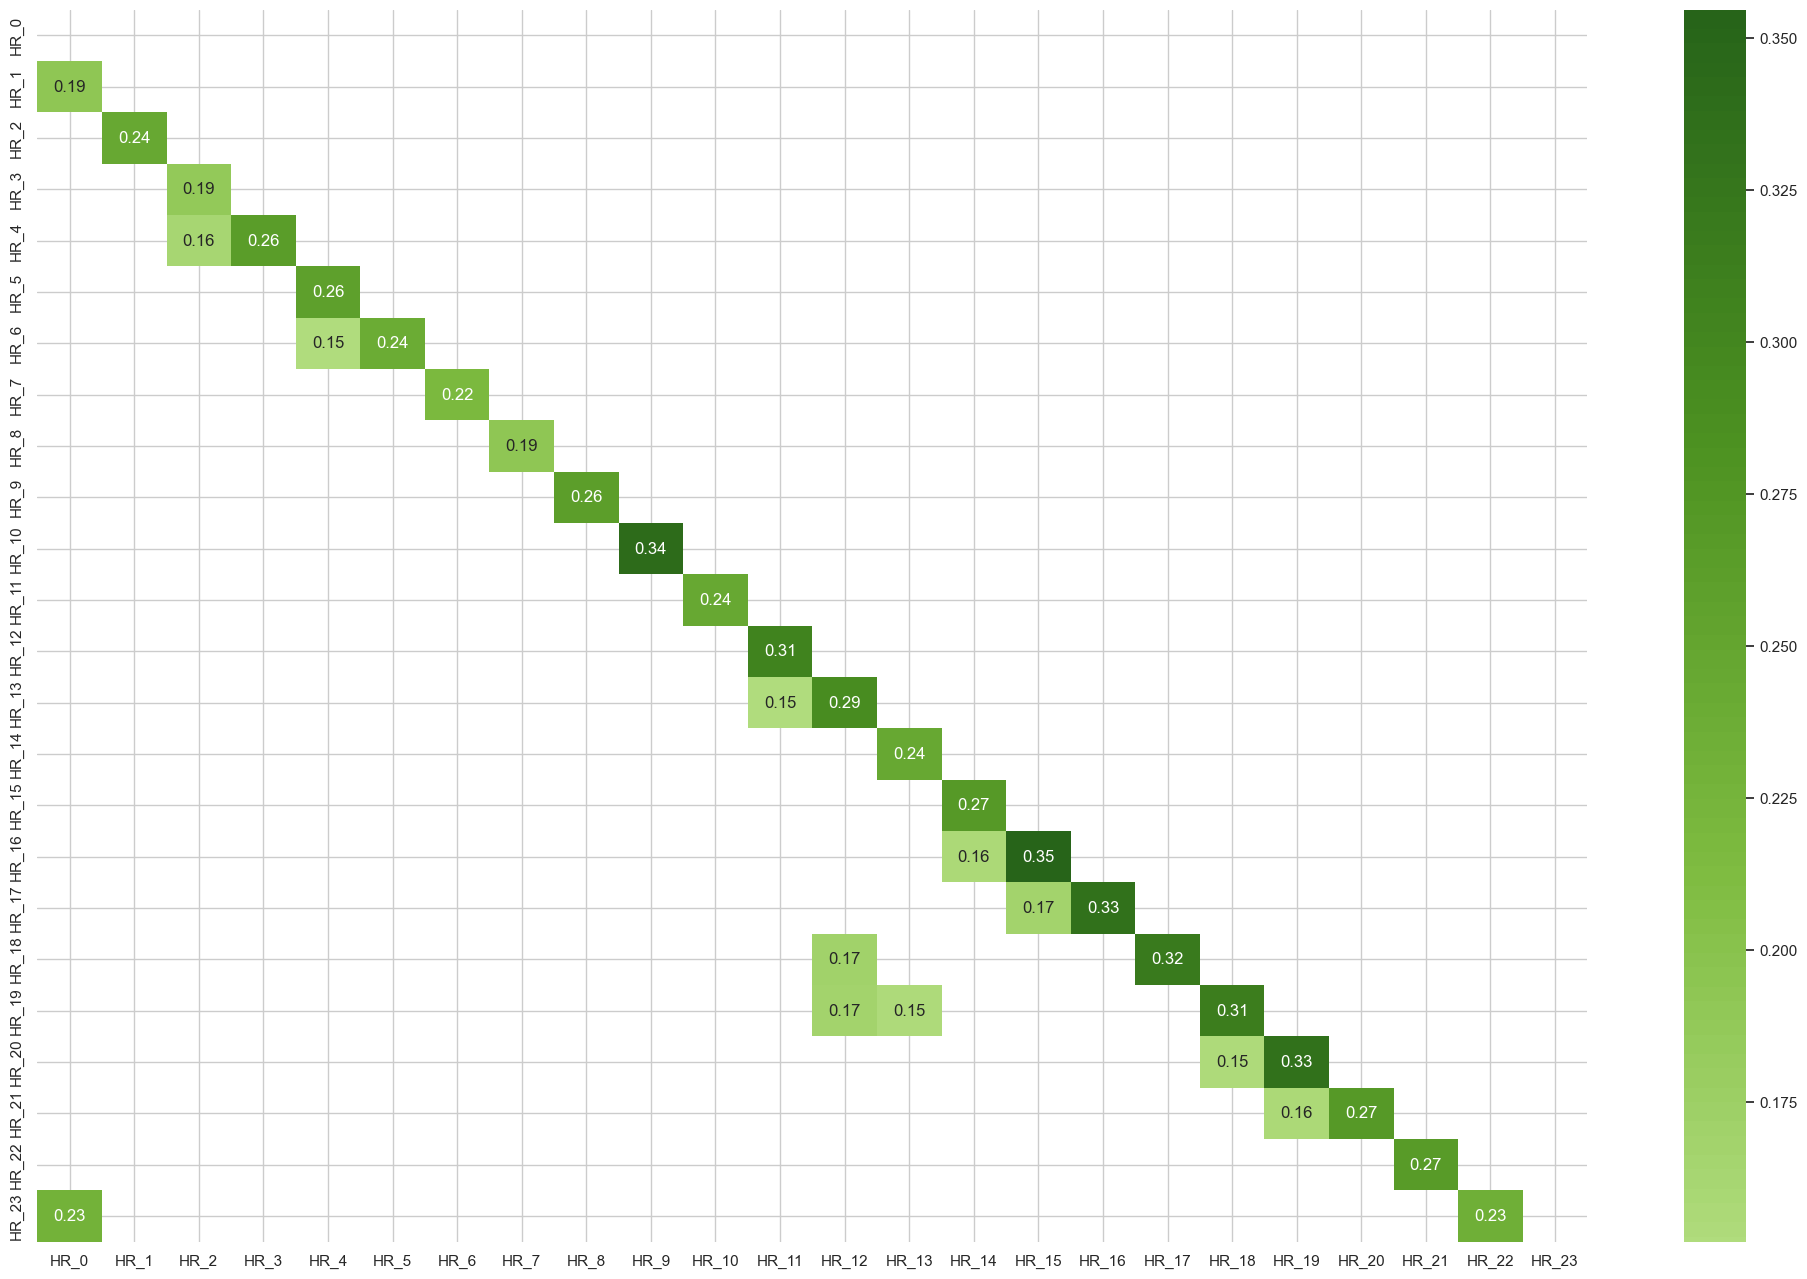

In [57]:
# ver correlacao entre horas
corr = df[hr_cols].corr(method='pearson')
lower_triangle_mask = np.triu(np.ones(corr.shape)).astype(bool)
cor_mat_lower = corr.mask(lower_triangle_mask)
plt.figure(figsize = (25,16))
sns.heatmap(cor_mat_lower[abs(cor_mat_lower) > 0.15],
            annot=True,
            cmap='PiYG',
            center=0);
# correlacao com horas previas
# correlacao horas de almoco e jantar


<h4>Pairplots</h4>

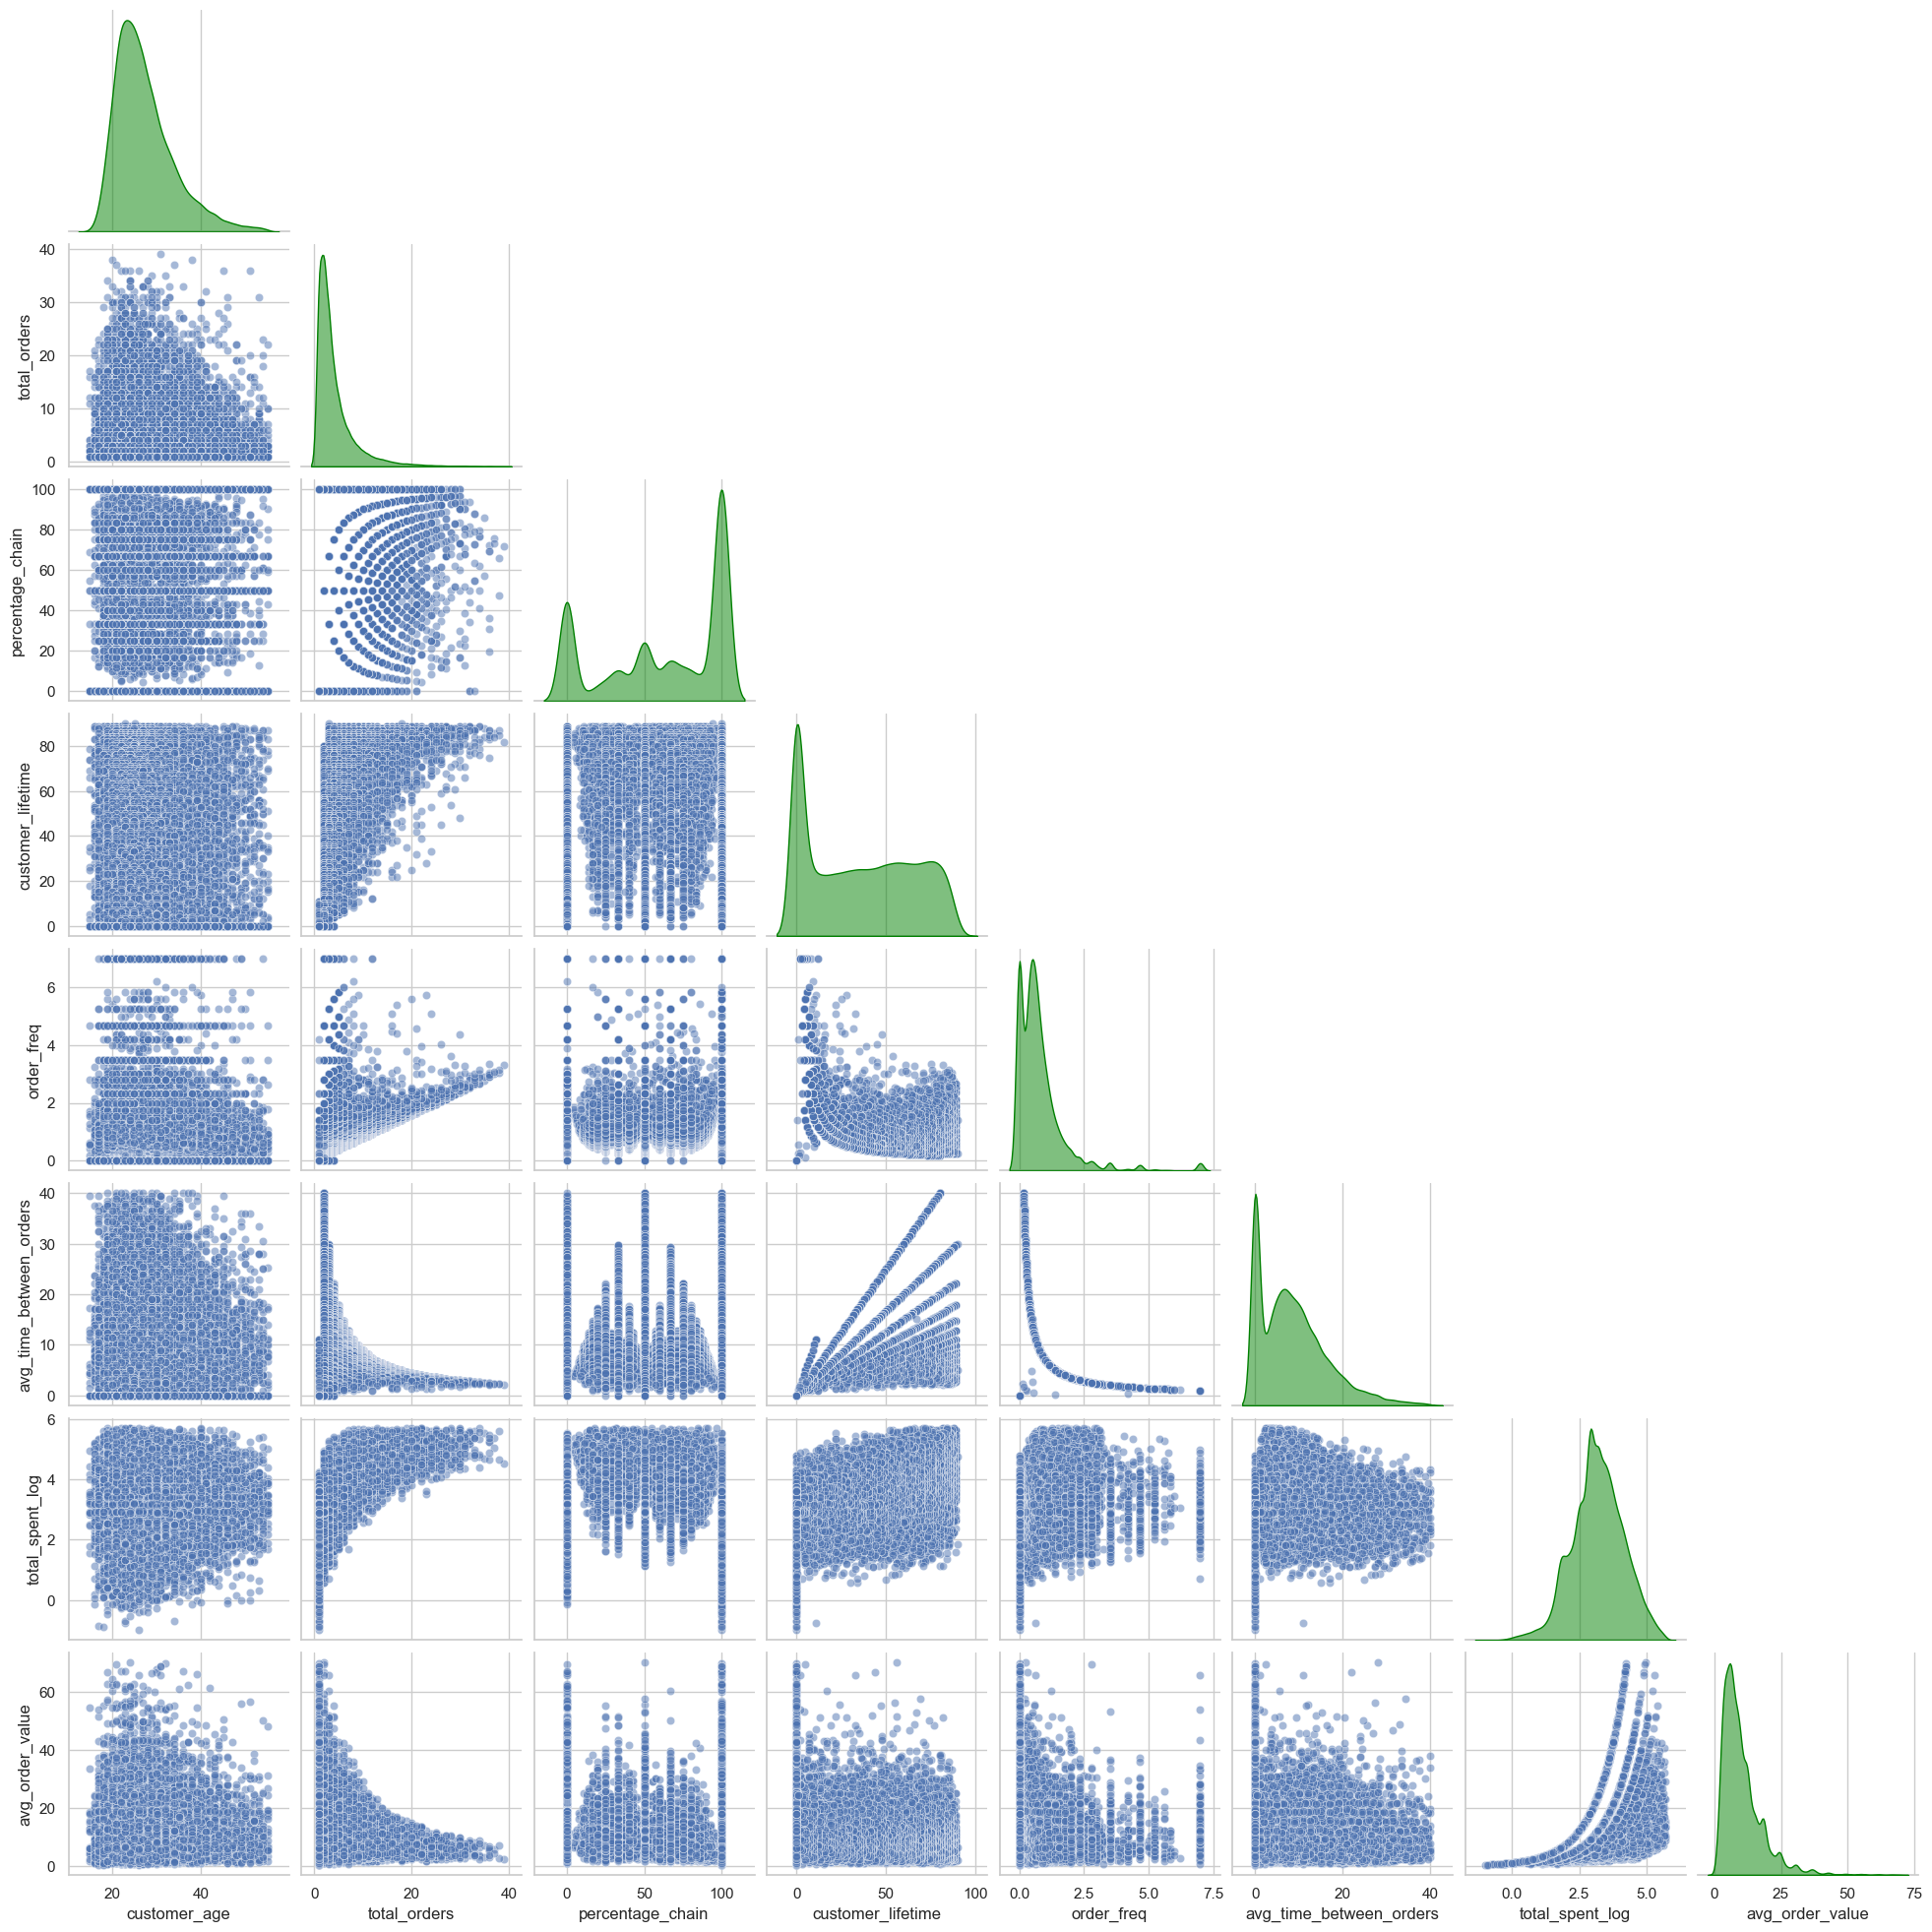

In [58]:
subset = [x for x in numericals if x not in hr_cols and x not in CUI_cols and x not in dow_cols and x not in CUI_log_cols]
subset.remove("product_count")
subset.remove("vendor_count")
sns.pairplot(df[subset],
             diag_kind='kde',
             markers='o',
             palette='husl',
             plot_kws={'alpha':0.5},
             diag_kws={'alpha':0.5, 'color':'green'},
             corner=True)

In [59]:
def hexbin_with_details(x, y, **kwargs):
    ax = plt.gca()
    cmap = kwargs.pop('cmap', 'Greys')
    gridsize = kwargs.pop('gridsize', 30)
    hb = ax.hexbin(x, y, gridsize=gridsize, cmap=cmap, mincnt=1, **kwargs, bins='log')
    ax.set_xlabel(kwargs.get('xlabel', ''))
    ax.set_ylabel(kwargs.get('ylabel', ''))
    cb = plt.colorbar(hb, ax=ax)

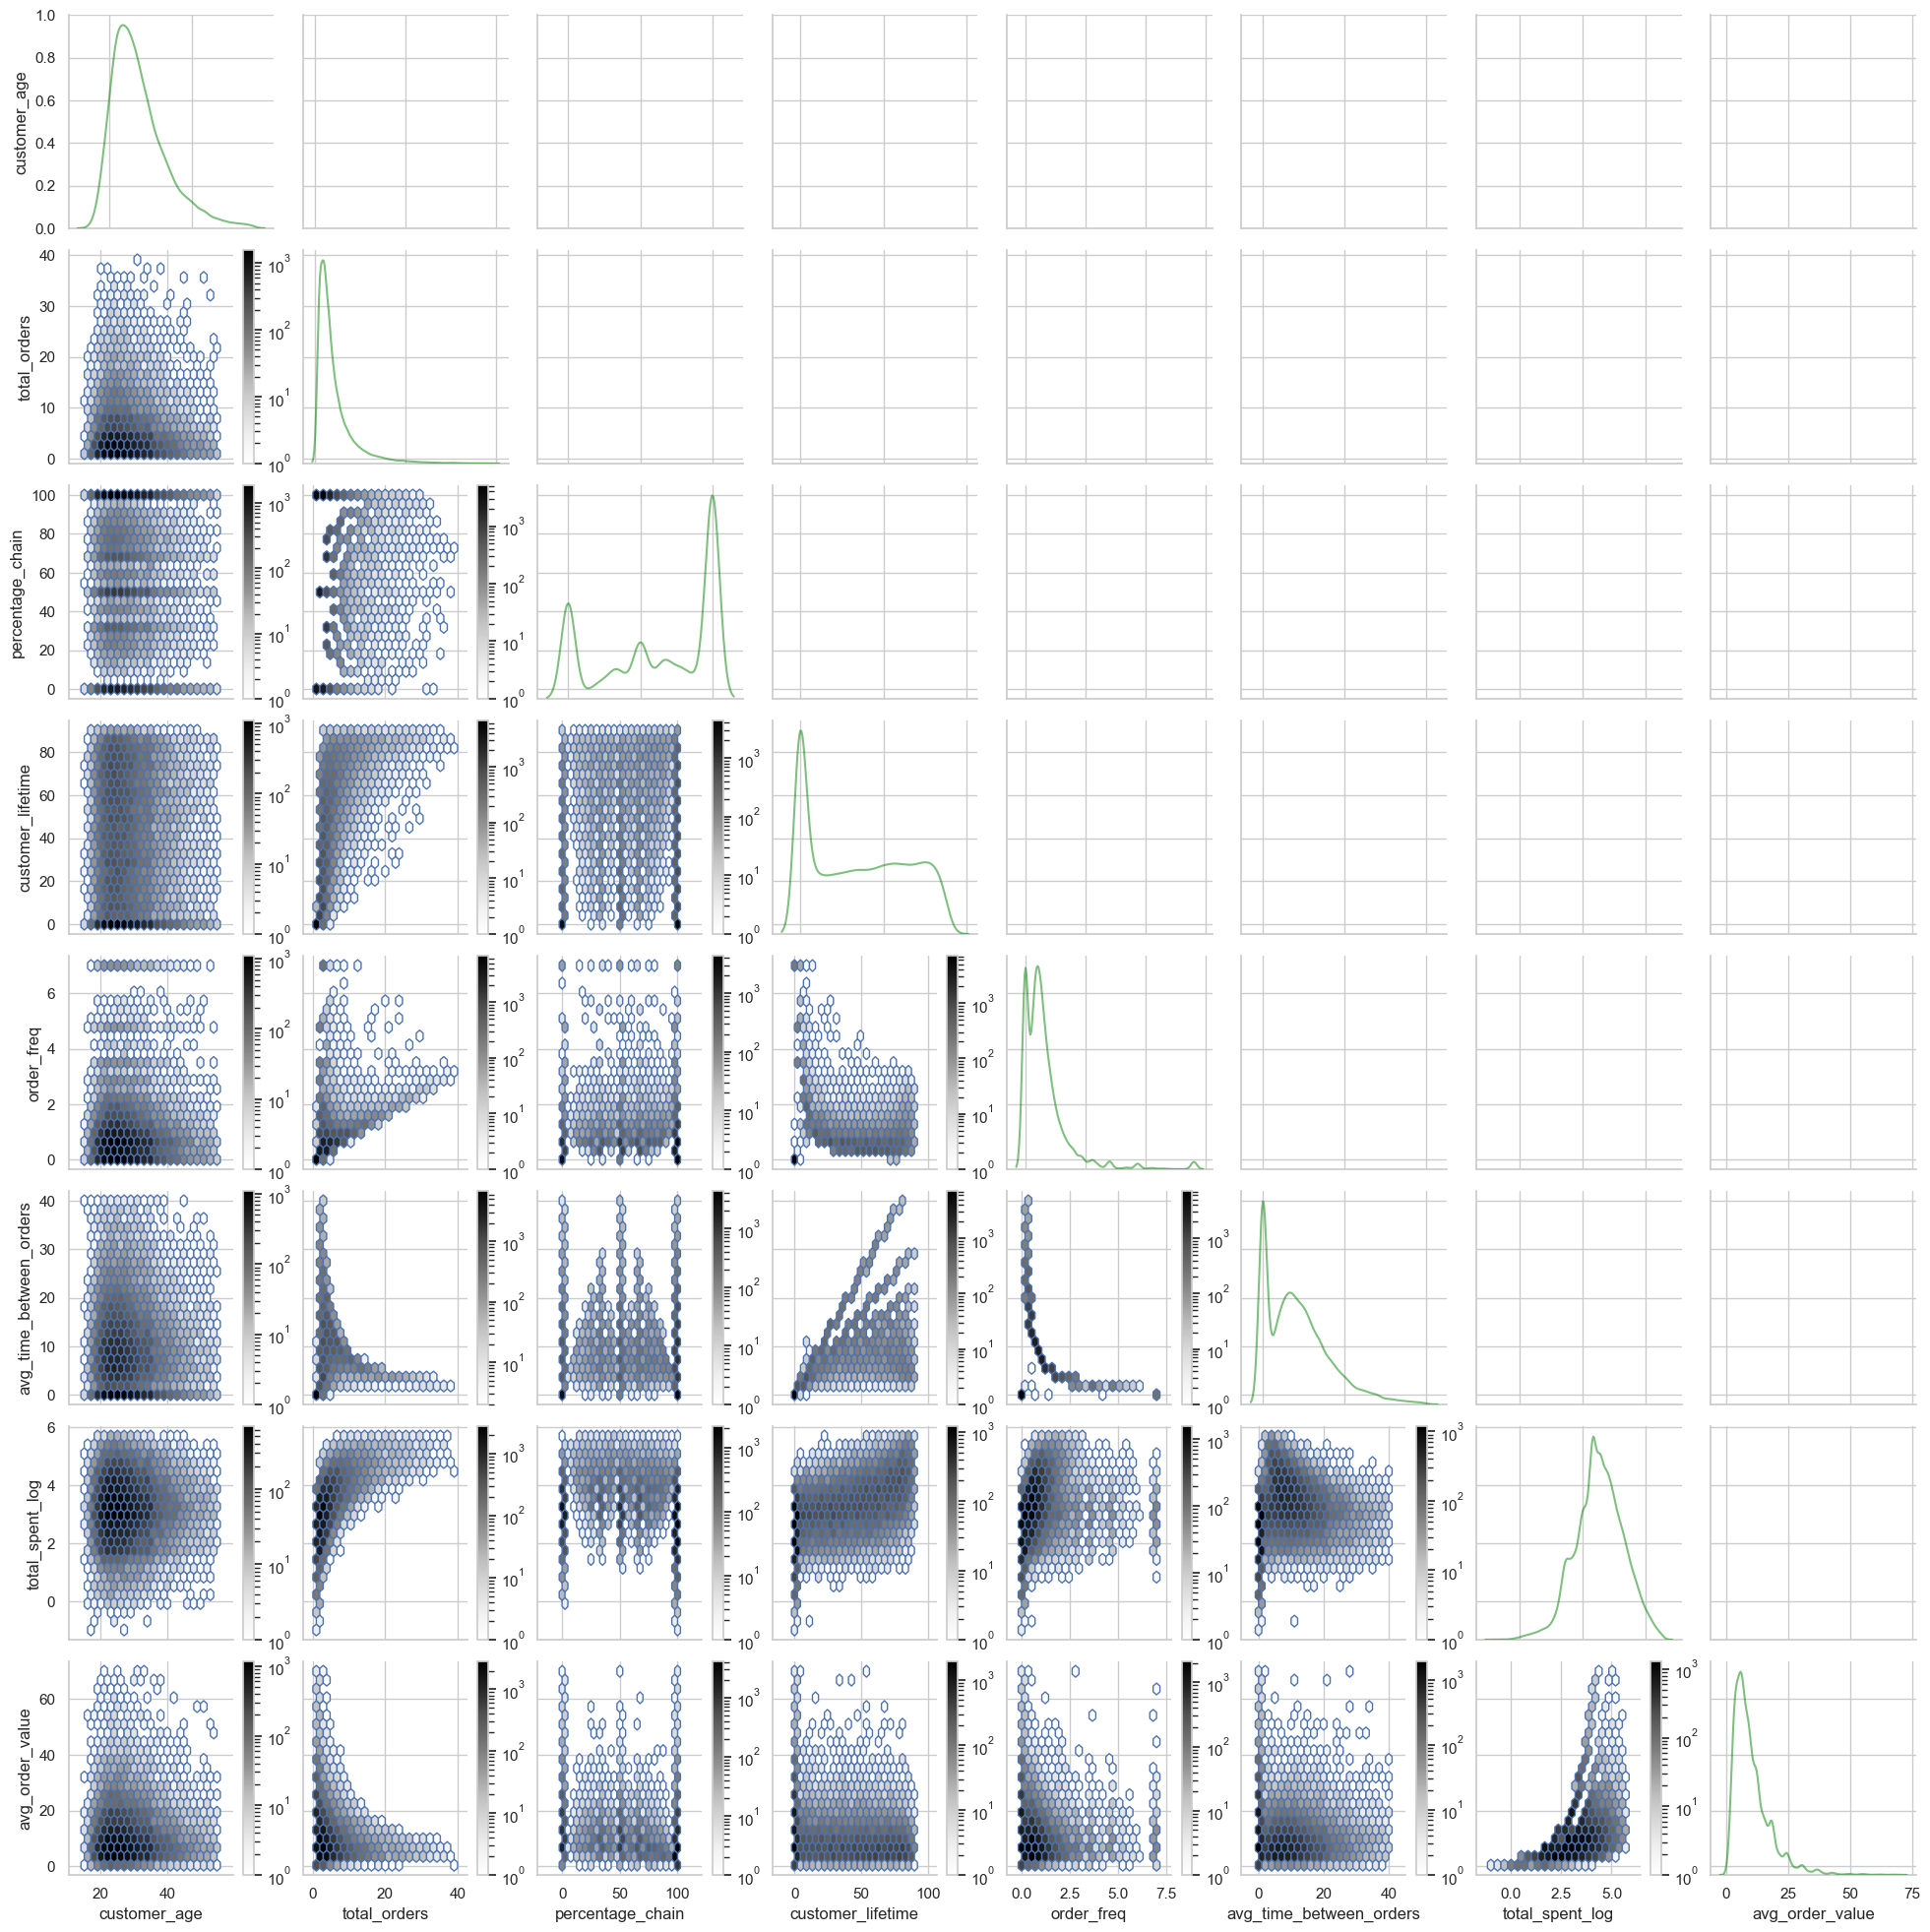

In [60]:
g = sns.PairGrid(df[subset], diag_sharey=False)
g.map_lower(hexbin_with_details, cmap='Greys', gridsize=20)
g.map_diag(sns.kdeplot, color='green', alpha=0.5)
plt.show()


<h3 id='categorical-categorical'>4.2 Categoricals vs. Categoricals</h3>

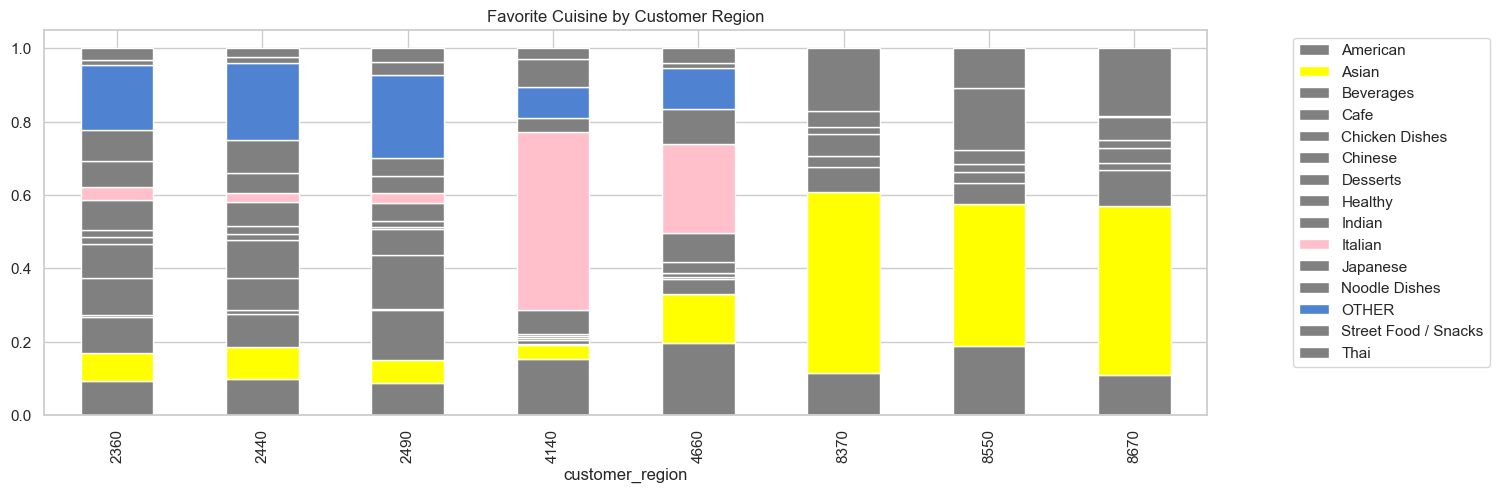

In [61]:
main_cat = "customer_region"
len(df.favorite_cuisine.unique())
predominant_cuisine = df.groupby(main_cat)["favorite_cuisine"].apply(lambda x: x.mode().iloc[0])
cuisine_colors = {"Italian": "pink", "OTHER": "#4f82d1", "Asian": "yellow"}
for cuisine in df["favorite_cuisine"].unique():
    if cuisine not in cuisine_colors.keys():
        cuisine_colors[cuisine] = "grey"
(df.groupby(["customer_region", "favorite_cuisine"]).size() / df.groupby(["customer_region"])["favorite_cuisine"].size()).unstack().plot(
    kind='bar',
    stacked=True,
    figsize=(15, 5),
    color=cuisine_colors)
plt.title(f"Favorite Cuisine by Customer Region")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# favorite cuisine


<Axes: xlabel='customer_region'>

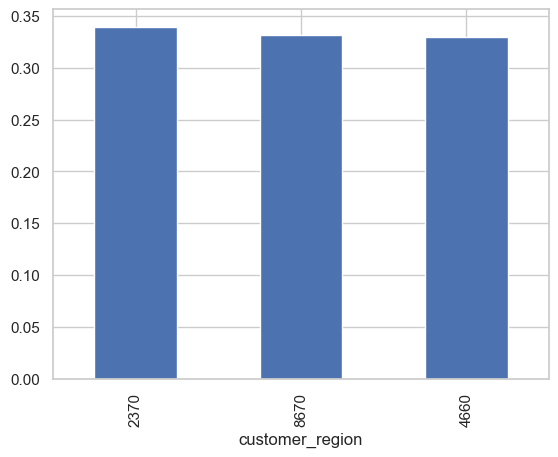

In [62]:
df["customer_region"] = np.where(df["customer_region"].str.startswith("8"), "8670", df["customer_region"])
df["customer_region"] = np.where(df["customer_region"].str.startswith("4"), "4660", df["customer_region"])
df["customer_region"] = np.where(df["customer_region"].str.startswith("2"), "2370", df["customer_region"])
df["customer_region"].value_counts(normalize=True).plot(kind="bar")

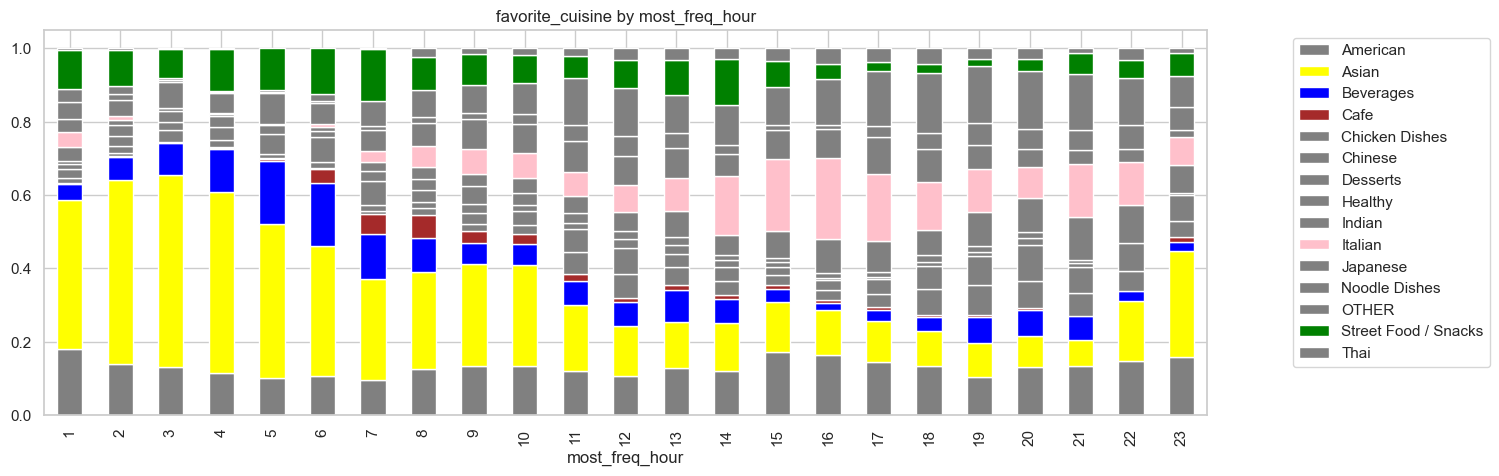

In [63]:
main_cat = "most_freq_hour"
predominant_cuisine = df.groupby(main_cat)["favorite_cuisine"].apply(lambda x: x.mode().iloc[0])
sorted_hours = sorted(df["most_freq_hour"].astype(int).unique())
sorted_hours = [str(hour) for hour in sorted_hours]
other_vars = ["favorite_cuisine"]
cuisine_colors = {"Italian": "pink", "Beverages": "blue", "Asian": "yellow", "Street Food / Snacks": "green", "Cafe": "brown"}
for cuisine in df["favorite_cuisine"].unique():
    if cuisine not in cuisine_colors.keys():
        cuisine_colors[cuisine] = "grey"
for cat in other_vars:
    (df.groupby([main_cat, cat]).size() / df.groupby([main_cat])[cat].size()).unstack().reindex(sorted_hours).plot(kind='bar', stacked=True, figsize=(15, 5), color=cuisine_colors)
plt.title(f"{cat} by {main_cat}")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

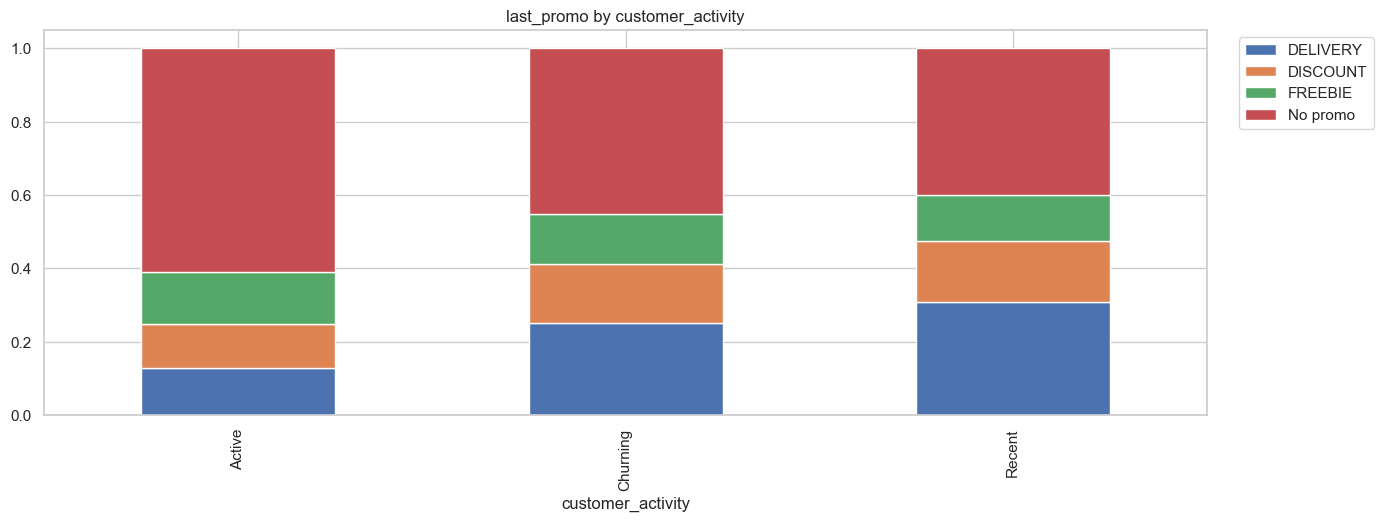

In [64]:
main_cat = "customer_activity"
other_vars = ["last_promo"]
for cat in other_vars:
    (df.groupby([main_cat, cat]).size() / df.groupby([main_cat])[cat].size()).unstack().plot(kind='bar', stacked=True, figsize=(15, 5))
    plt.title(f"{cat} by {main_cat}")
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()


<h3 id='categorical-numerical'>4.3 Categoricals vs. numericals</h3>

In [65]:
num_cols = [col for col in df.columns if df[col].dtype != object and df[col].dtype != bool]
num_cols = [col for col in num_cols if col not in CUI_cols and col not in hr_cols and col not in dow_cols and col not in CUI_log_cols]
num_cols.remove("product_count")
num_cols.remove("vendor_count")
num_cols.remove("total_spent")
num_cols.remove("last_order")
num_cols.remove("first_order")

cat_cols = [col for col in df.columns if df[col].dtype == object or df[col].dtype == bool]
cat_cols.remove("last_promo")

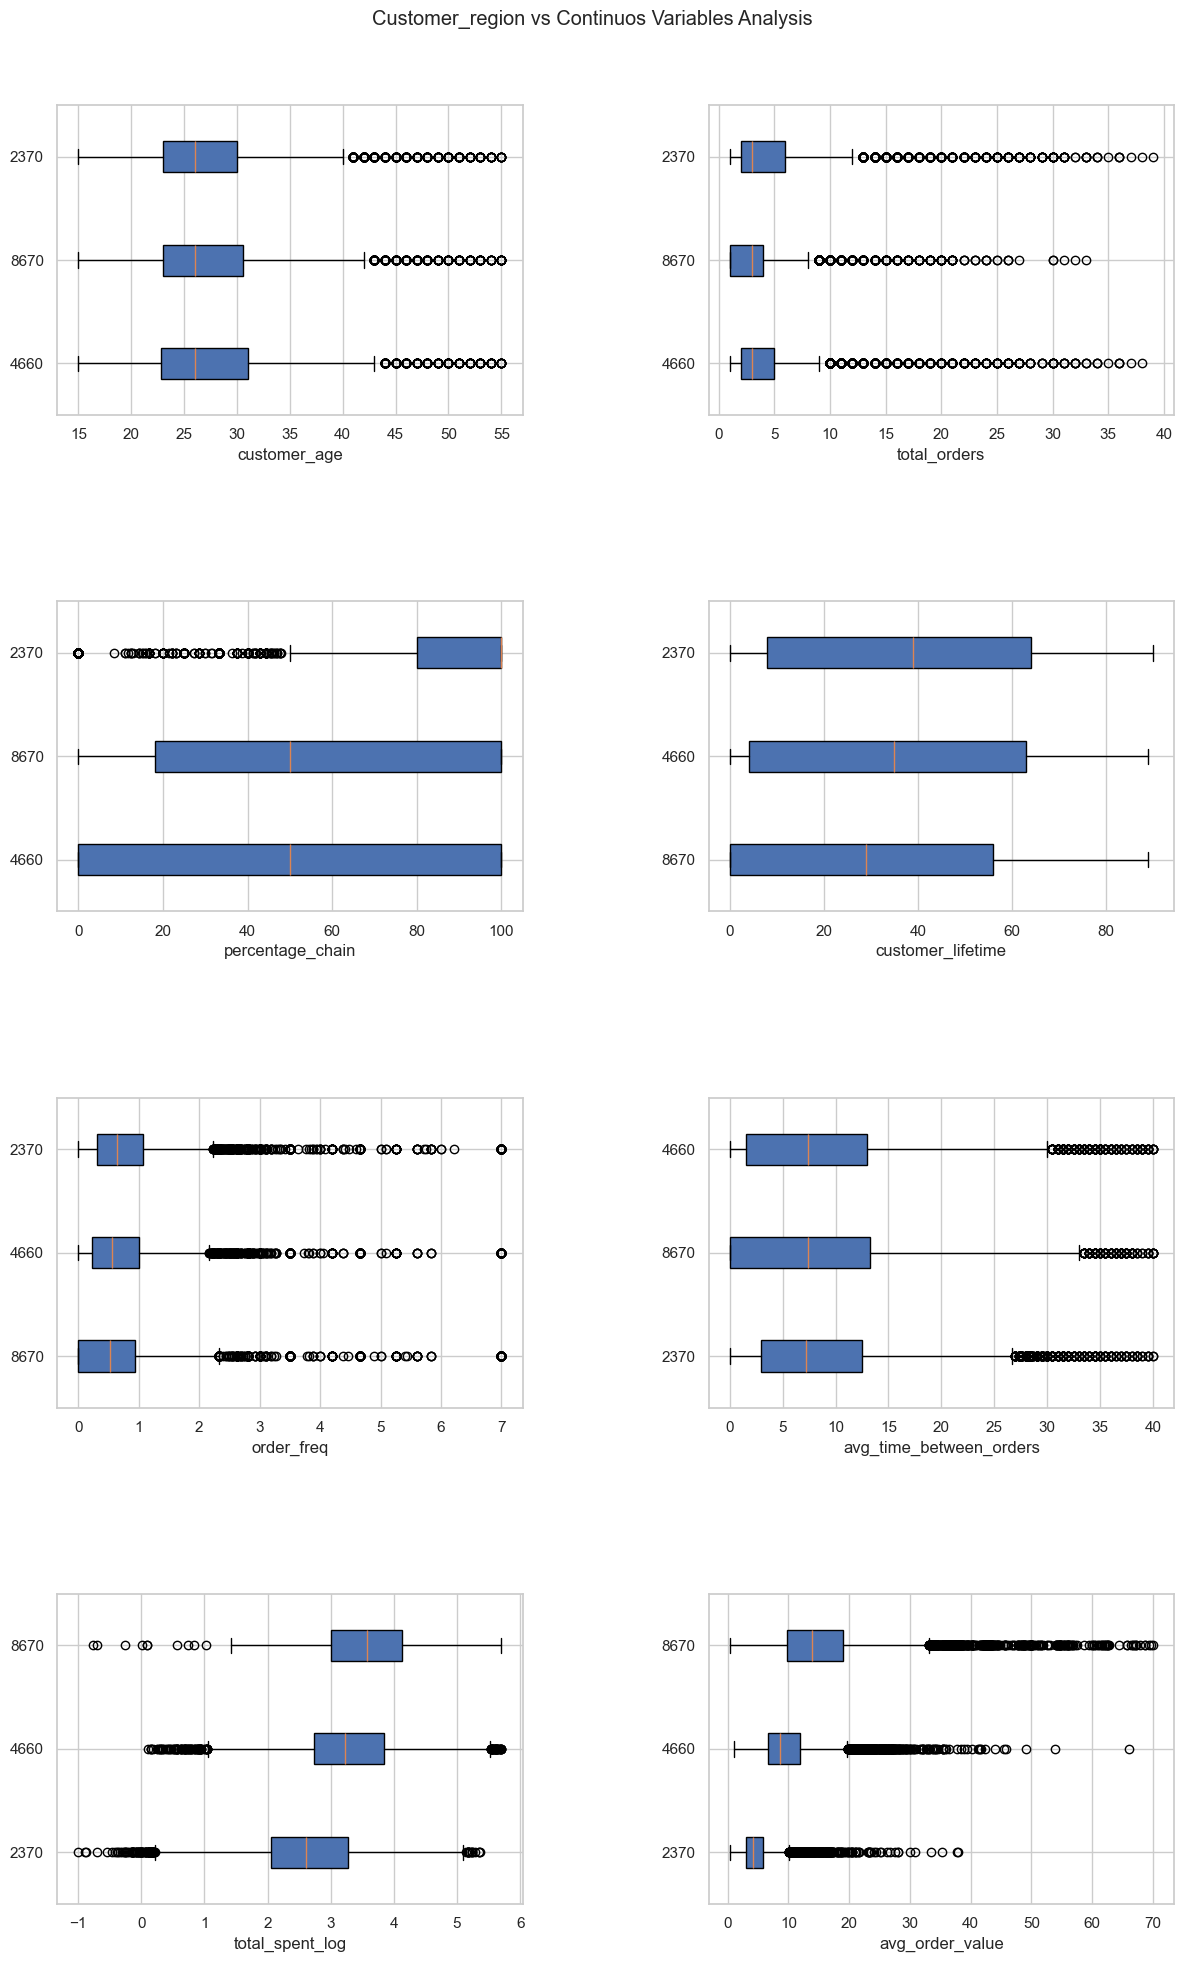

In [66]:
sns.set(style="whitegrid")
cat = "customer_region"
n_figures = len(num_cols)
cols = 2
rows = math.ceil(n_figures / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
for ax, num in zip(axes.flatten(), num_cols):
    if df[num].isna().sum() > 0:
        df_copy = df.dropna(subset=[num])
    else:
        df_copy = df.copy()
    num_groups = []
    categories = df_copy[cat].unique()
    for c in categories:
         num_group = df_copy[df_copy[cat] == c][num]
         num_groups.append((c, num_group))
    if cat == "most_freq_day":
        sorted_categories = ["Sun", "Sat", "Fri", "Thu", "Wed", "Tue", "Mon"]
        sorted_num_groups = [df_copy[df_copy[cat] == day][num] for day in sorted_categories]
    elif cat == "most_freq_hour":
        sorted_categories = [str(i) for i in range(23, -1, -1)]
        sorted_num_groups = [df_copy[df_copy[cat] == hour][num] for hour in sorted_categories]
    else:
        num_groups.sort(key=lambda x: x[1].median())
        sorted_categories = [x[0] for x in num_groups]
        sorted_num_groups = [x[1] for x in num_groups]
    ax.boxplot(sorted_num_groups, labels=sorted_categories, patch_artist=True, vert=False)
    ax.set_xlabel(num)
title = f"{cat.capitalize()} vs Continuos Variables Analysis"
plt.suptitle(title)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(wspace=0.4, hspace=0.6)


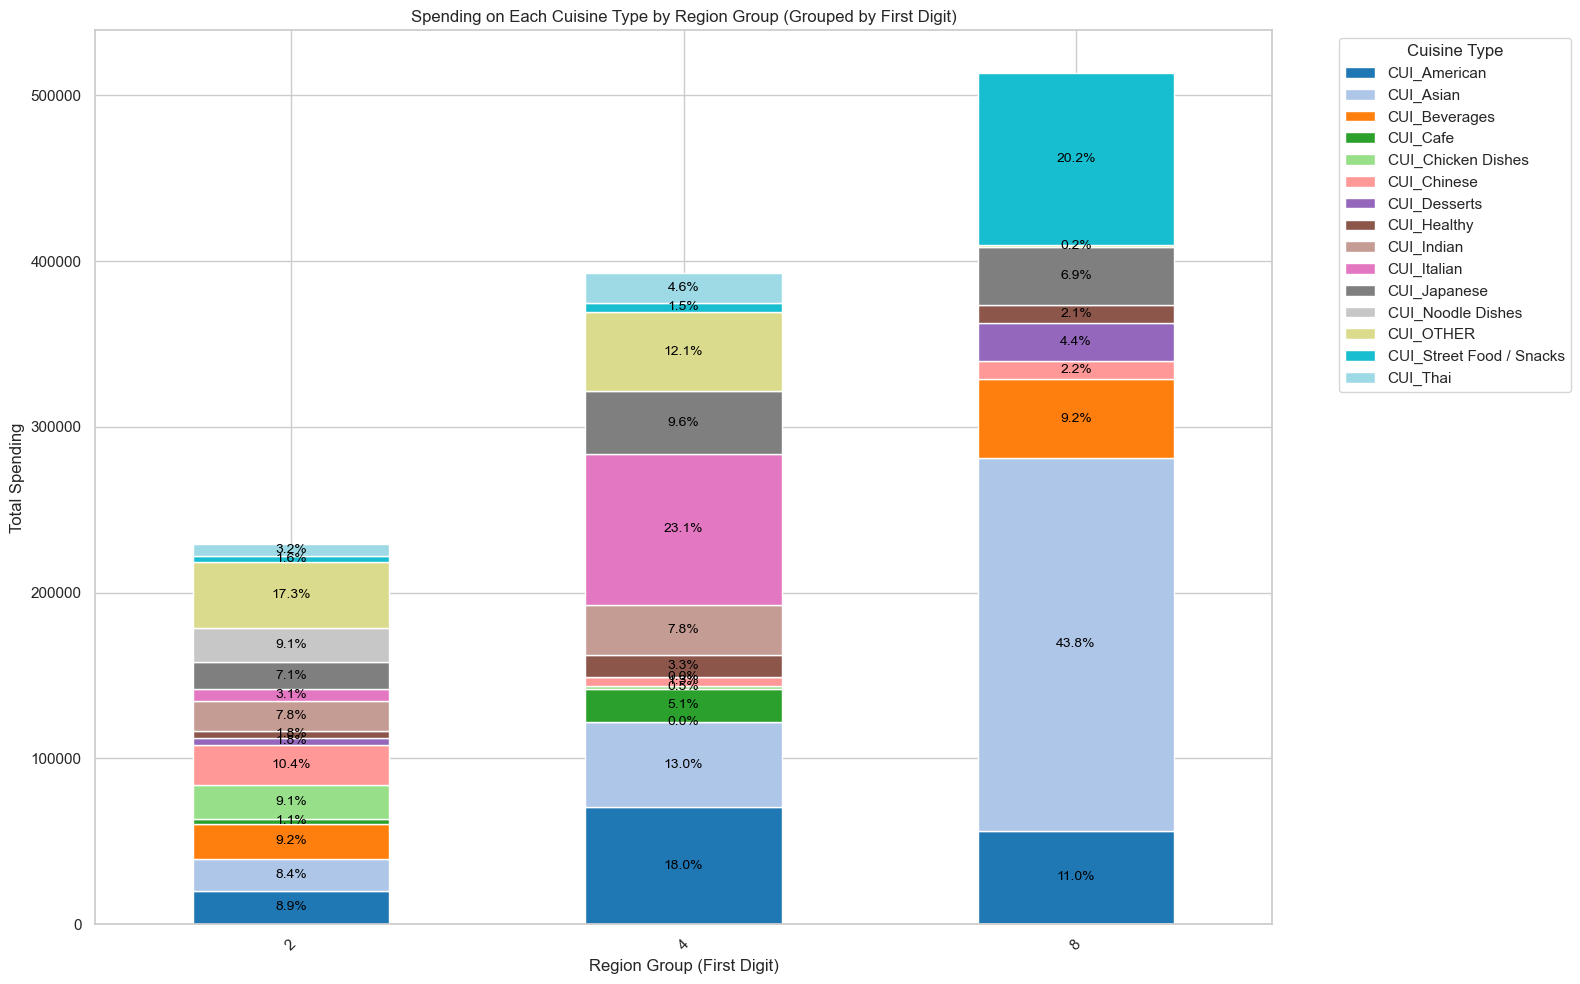

In [67]:

# Assuming 'df' is the DataFrame containing the data
# List of cuisine columns and region column
cuisine_columns = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
    'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai'
]
region_column = 'customer_region'

# Group by the first digit of each region
df['region_group'] = df[region_column].astype(str).str[0]

# Calculate the total spending per cuisine for each grouped region
region_group_cuisine_totals = df.groupby('region_group')[cuisine_columns].sum()

# Calculate the total spending per region group to get percentages
region_group_totals = region_group_cuisine_totals.sum(axis=1)

# Plotting the total spending for each cuisine type per region group
fig, ax = plt.subplots(figsize=(16, 10))
bars = region_group_cuisine_totals.plot(kind="bar", stacked=True, ax=ax, colormap='tab20')

plt.title("Spending on Each Cuisine Type by Region Group (Grouped by First Digit)")
plt.xlabel("Region Group (First Digit)")
plt.ylabel("Total Spending")
plt.legend(title="Cuisine Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate percentages on the bars
for i, region in enumerate(region_group_cuisine_totals.index):
    cumulative_height = 0
    for cuisine in cuisine_columns:
        value = region_group_cuisine_totals.loc[region, cuisine]
        if value > 0:
            cumulative_height += value
            percentage = (value / region_group_totals[region]) * 100
            ax.text(i, cumulative_height - (value / 2), f'{percentage:.1f}%',
                    ha='center', va='center', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df = df.drop('region_group', axis=1)

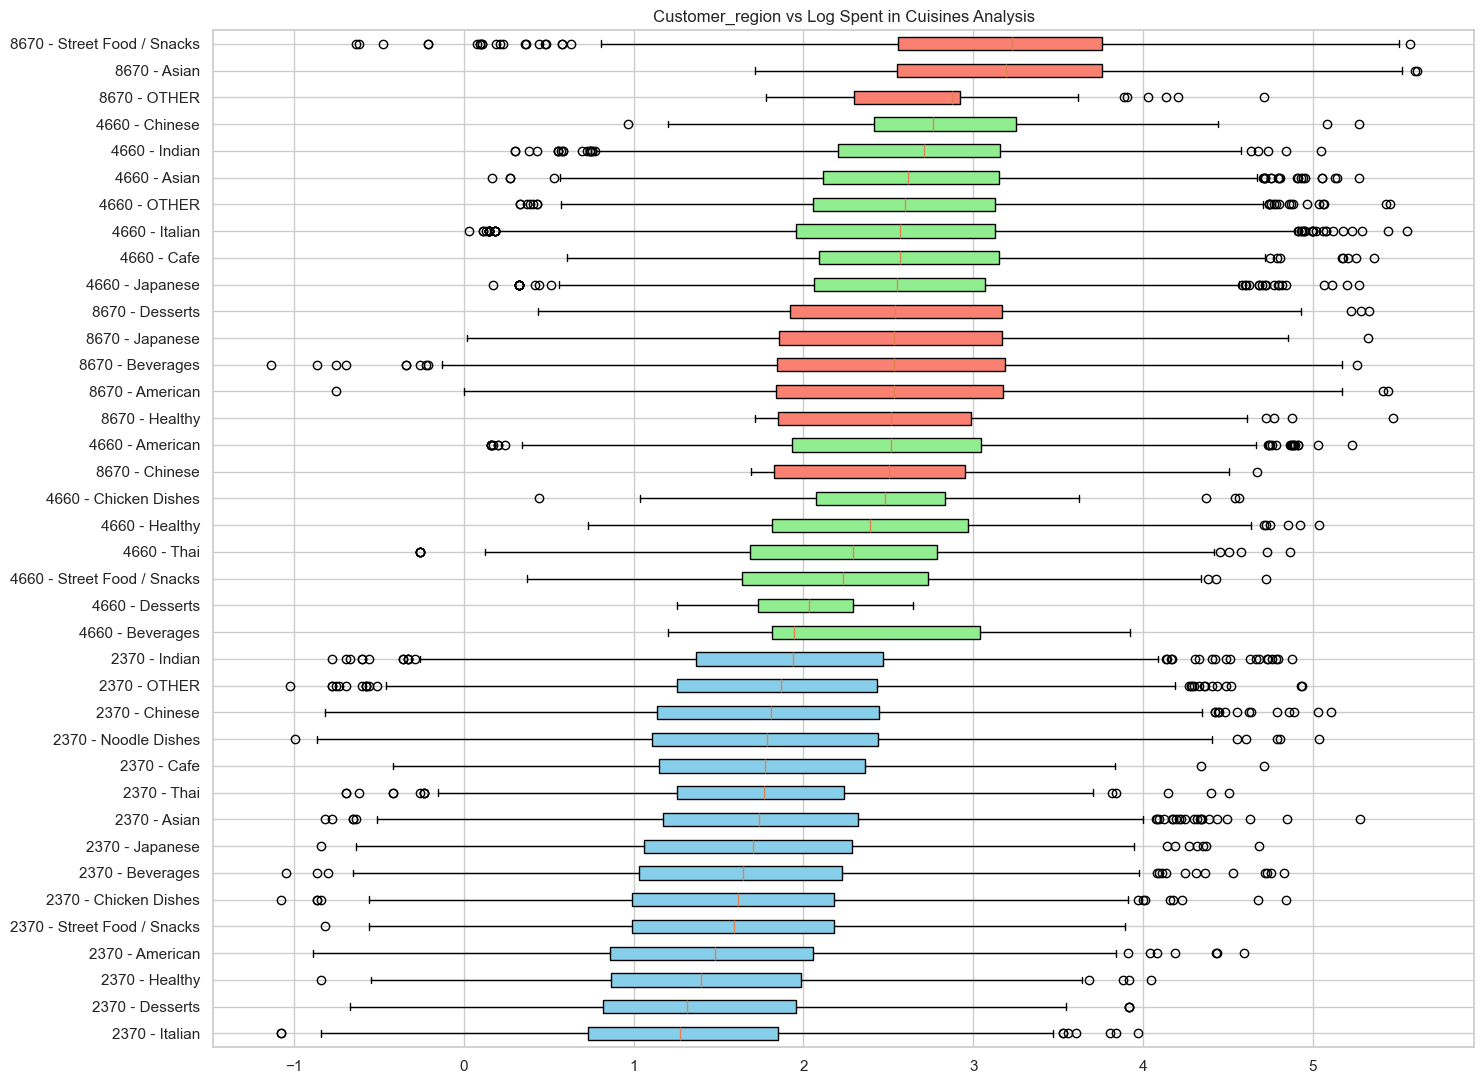

In [68]:
sns.set(style="whitegrid")
cat = "customer_region"

region_colors = {
    "2370": "skyblue",
    "4660": "lightgreen",
    "8670": "salmon"
}

colors = []
labels = []
CUI_logs = []
for reg in ["2370", "4660", "8670"]:
    for cui in CUI_log_cols:
        data = df[df["customer_region"] == reg][cui].dropna()
        if not data.empty:
            labels.append(f"{reg} - {cui.split('_')[1]}")
            CUI_logs.append(data)
            colors.append(region_colors[reg])

medians = [np.median(log) for log in CUI_logs]

sorted_data = sorted(zip(medians, CUI_logs, labels, colors), key=lambda x: x[0])
medians, CUI_logs, labels, colors = zip(*sorted_data)

fig, ax = plt.subplots(figsize=(15, 11))
boxplots = ax.boxplot(CUI_logs, labels=labels, patch_artist=True, vert=False)
plt.title(f"{cat.capitalize()} vs Log Spent in Cuisines Analysis")

for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

plt.tight_layout()
plt.show()


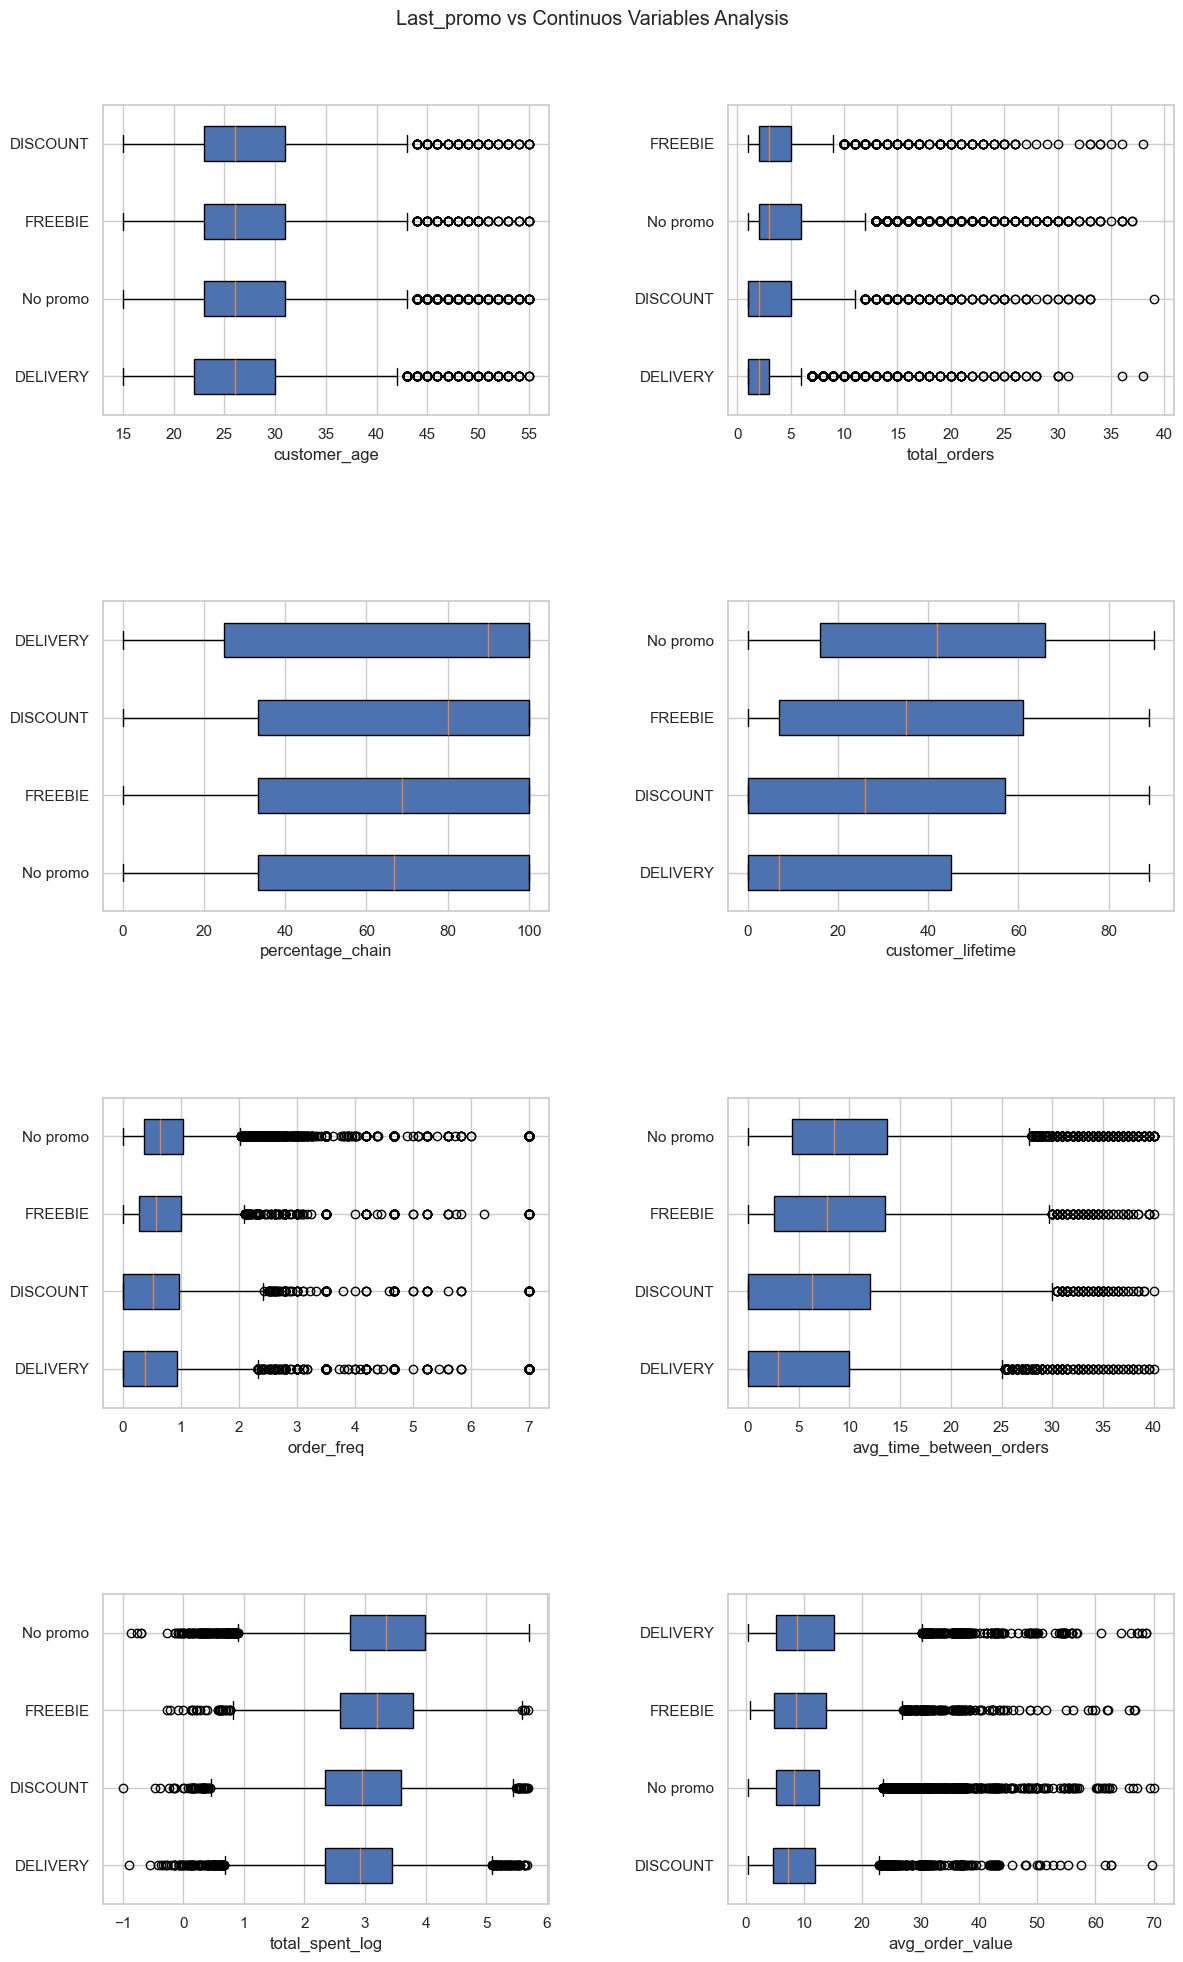

In [69]:
sns.set(style="whitegrid")
cat = "last_promo"
n_figures = len(num_cols)
cols = 2
rows = math.ceil(n_figures / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
for ax, num in zip(axes.flatten(), num_cols):
    if df[num].isna().sum() > 0:
        df_copy = df.dropna(subset=[num])
    else:
        df_copy = df.copy()
    num_groups = []
    categories = df_copy[cat].unique()
    for c in categories:
         num_group = df_copy[df_copy[cat] == c][num]
         num_groups.append((c, num_group))
    if cat == "most_freq_day":
        sorted_categories = ["Sun", "Sat", "Fri", "Thu", "Wed", "Tue", "Mon"]
        sorted_num_groups = [df_copy[df_copy[cat] == day][num] for day in sorted_categories]
    elif cat == "most_freq_hour":
        sorted_categories = [str(i) for i in range(23, -1, -1)]
        sorted_num_groups = [df_copy[df_copy[cat] == hour][num] for hour in sorted_categories]
    else:
        num_groups.sort(key=lambda x: x[1].median())
        sorted_categories = [x[0] for x in num_groups]
        sorted_num_groups = [x[1] for x in num_groups]
    ax.boxplot(sorted_num_groups, labels=sorted_categories, patch_artist=True, vert=False)
    ax.set_xlabel(num)
title = f"{cat.capitalize()} vs Continuos Variables Analysis"
plt.suptitle(title)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(wspace=0.4, hspace=0.6)

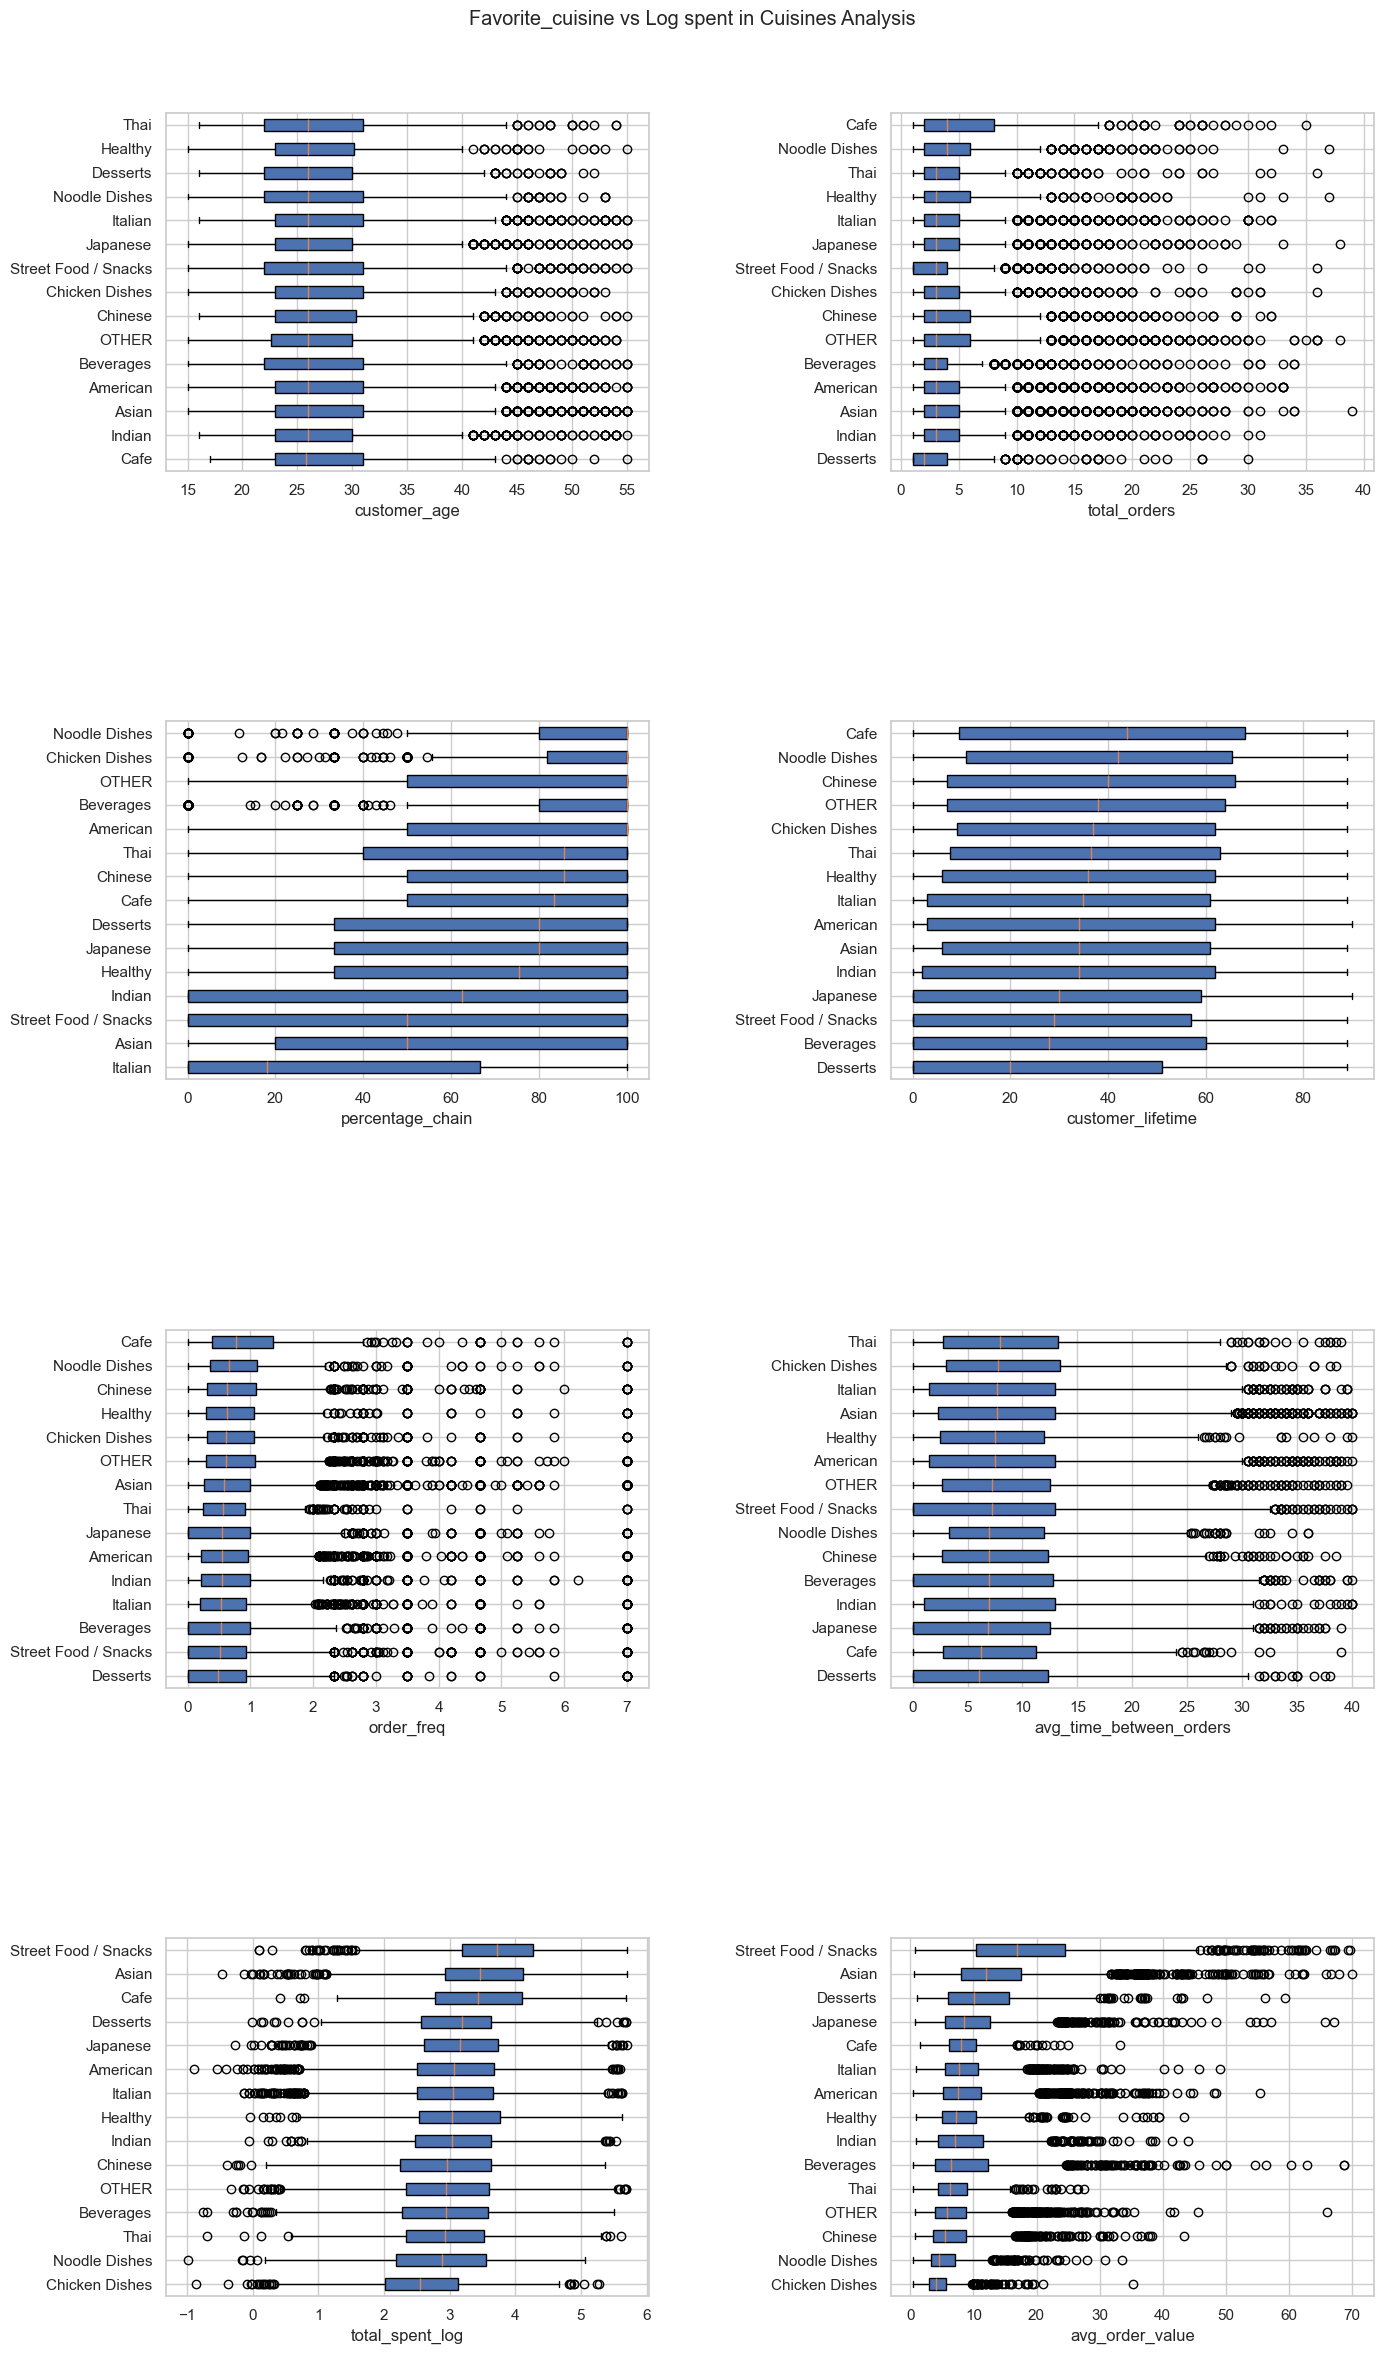

In [70]:
sns.set(style="whitegrid")
cat = "favorite_cuisine"
n_figures = len(num_cols)
cols = 2
rows = math.ceil(n_figures / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*7, rows*6))
for ax, num in zip(axes.flatten(), num_cols):
    if df[num].isna().sum() > 0:
        df_copy = df.dropna(subset=[num])
    else:
        df_copy = df.copy()
    num_groups = []
    categories = df_copy[cat].unique()
    for c in categories:
         num_group = df_copy[df_copy[cat] == c][num]
         num_groups.append((c, num_group))
    if cat == "most_freq_day":
        sorted_categories = ["Sun", "Sat", "Fri", "Thu", "Wed", "Tue", "Mon"]
        sorted_num_groups = [df_copy[df_copy[cat] == day][num] for day in sorted_categories]
    elif cat == "most_freq_hour":
        sorted_categories = [str(i) for i in range(23, -1, -1)]
        sorted_num_groups = [df_copy[df_copy[cat] == hour][num] for hour in sorted_categories]
    else:
        num_groups.sort(key=lambda x: x[1].median())
        sorted_categories = [x[0] for x in num_groups]
        sorted_num_groups = [x[1] for x in num_groups]
    ax.boxplot(sorted_num_groups, labels=sorted_categories, patch_artist=True, vert=False)
    ax.set_xlabel(num)
title = f"{cat.capitalize()} vs Log spent in Cuisines Analysis"
plt.suptitle(title)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(wspace=0.5, hspace=0.7)

<h3 id='3-variables'> 4.4 Three variables associations</h3>

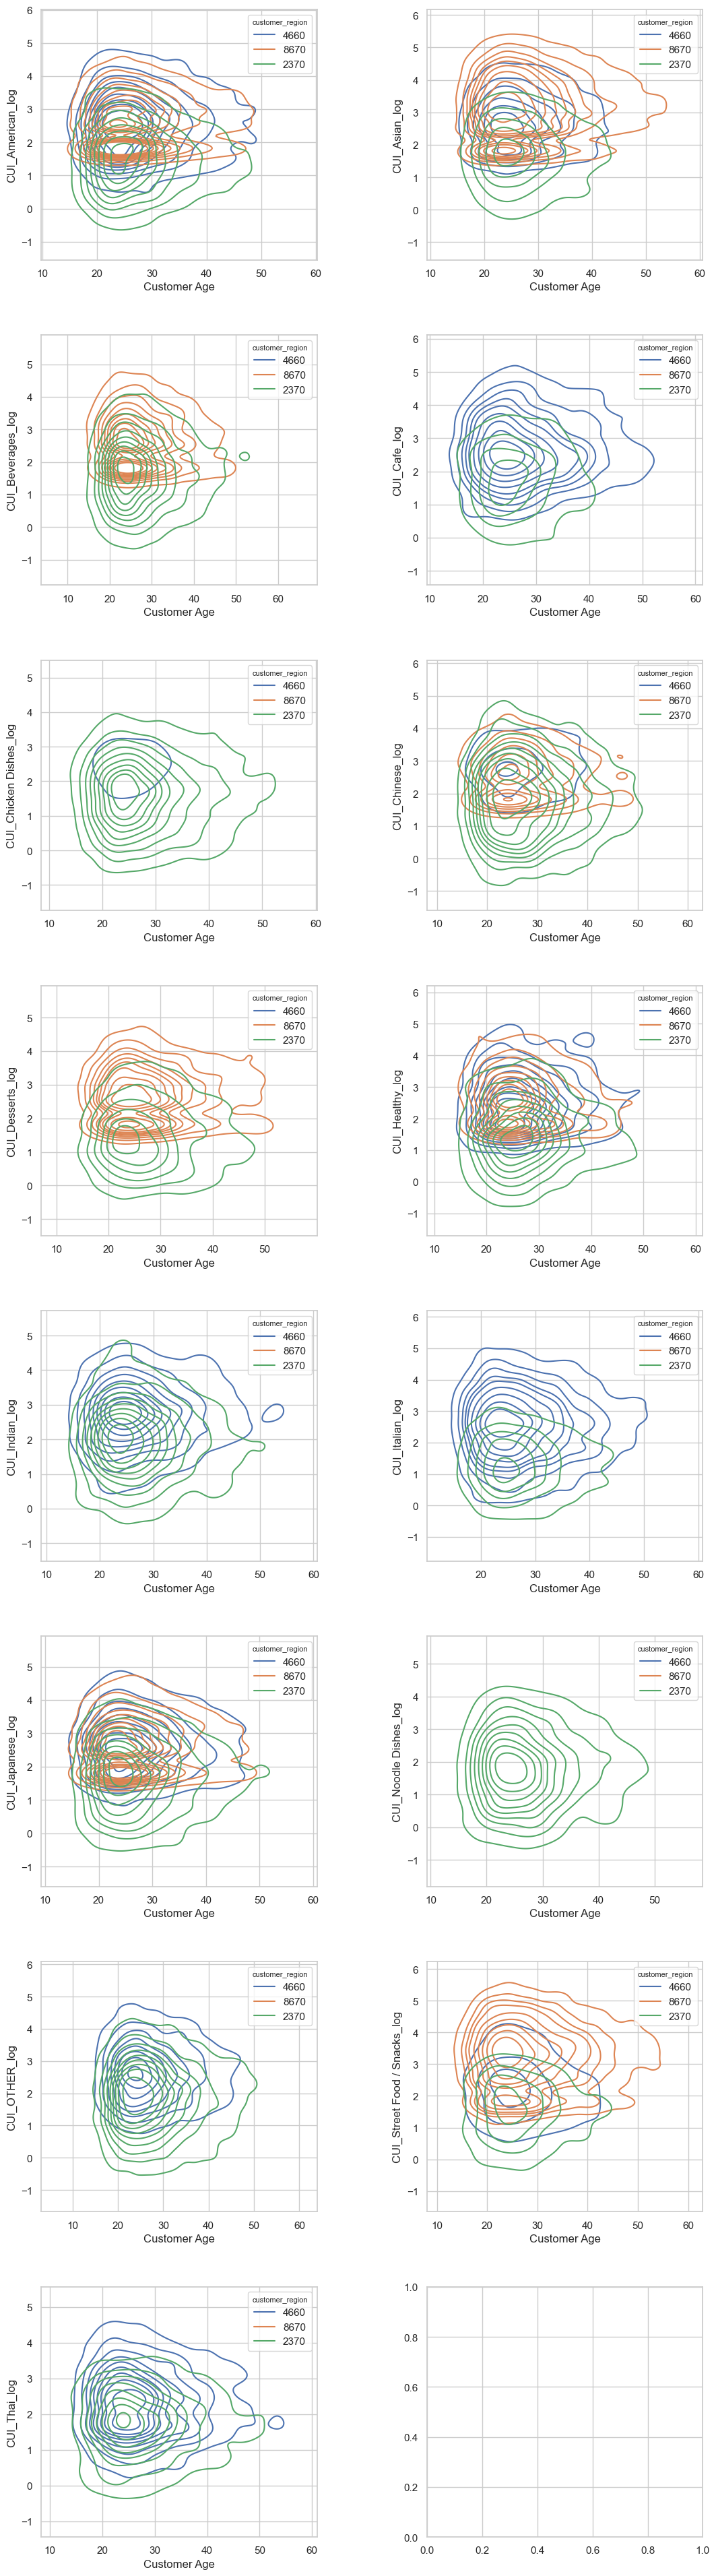

In [71]:
sns.set(style="whitegrid")
n_figures = len(CUI_log_cols)
cols = 2
rows = math.ceil(n_figures / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
for ax, num in zip(axes.flatten(), CUI_log_cols):
    kde = sns.kdeplot(data=df, x="customer_age", y=num, hue="customer_region", ax=ax)
    ax.set_xlabel("Customer Age")
    ax.set_ylabel(num)
    kde.legend_.prop.set_size(6)
    kde.legend_.get_title().set_fontsize(8)
plt.tight_layout(rect=[0, 0, 0.9, 0.96])
plt.subplots_adjust(wspace=0.4, hspace=0.3)

<h3 id='co-occurences'> 4.5 Co-occurences</h3>

In [72]:
CUI_codes = [(cui, i+1) for i, cui in enumerate(CUI_cols)]
df["CUI_codes"] = df[CUI_cols].apply(lambda x: [CUI_codes[i][1] for i in range(len(CUI_codes)) if x[i] > 0], axis=1)

co_occurrences = []
for row in df["CUI_codes"]:
    co_occurrences.extend(list(combinations(row, 2)))

df.drop(columns=["CUI_codes"], inplace=True)
co_occurrence_counts = Counter(co_occurrences)

co_occurrence_df = pd.DataFrame(co_occurrence_counts.items(), columns=['Co_occurrence', 'Frequency']).sort_values(by='Frequency', ascending=False)
co_occurrence_df

CUI_codes_inversed = {v: k for k, v in dict(CUI_codes).items()}

co_occurrence_df["Co_occurrence"] = co_occurrence_df["Co_occurrence"].apply(lambda x: (CUI_codes_inversed[x[0]], CUI_codes_inversed[x[1]]))

association_data = []
for (cuisine1, cuisine2), freq in zip(co_occurrence_df['Co_occurrence'], co_occurrence_df['Frequency']):
    association_data.append({'Cuisine': cuisine1, 'Associated_Cuisine': cuisine2, 'Frequency': freq})
    association_data.append({'Cuisine': cuisine2, 'Associated_Cuisine': cuisine1, 'Frequency': freq})
df_association = pd.DataFrame(association_data)

top_associations = df_association.groupby('Cuisine').apply(lambda x: x.nlargest(2, 'Frequency')).reset_index(drop=True)
top_associations

Cuisine Associated_Cuisine  Frequency
0               CUI_American          CUI_Asian       3789
1               CUI_American          CUI_OTHER       2529
2                  CUI_Asian       CUI_American       3789
3                  CUI_Asian       CUI_Japanese       2437
4              CUI_Beverages          CUI_Asian       2068
5              CUI_Beverages       CUI_American       1746
6                   CUI_Cafe       CUI_American        607
7                   CUI_Cafe          CUI_OTHER        571
8         CUI_Chicken Dishes          CUI_OTHER       1399
9         CUI_Chicken Dishes       CUI_American       1190
10               CUI_Chinese          CUI_OTHER       1249
11               CUI_Chinese          CUI_Asian       1225
12              CUI_Desserts          CUI_Asian        933
13              CUI_Desserts       CUI_American        680
14               CUI_Healthy          CUI_Asian        795
15               CUI_Healthy       CUI_American        703
16                CUI_Indian       CUI_American       1189
17                CUI_Indian          CUI_OTHER       1150
18               CUI_Italian       CUI_American       2393
19               CUI_Italian          CUI_OTHER       1799
20              CUI_Japanese          CUI_Asian       2437
21              CUI_Japanese       CUI_American       2272
22         CUI_Noodle Dishes          CUI_OTHER       1012
23         CUI_Noodle Dishes        CUI_Chinese        746
24                 CUI_OTHER       CUI_American       2529
25                 CUI_OTHER          CUI_Asian       1859
26  CUI_Street Food / Snacks          CUI_Asian       2030
27  CUI_Street Food / Snacks       CUI_American       1384
28                  CUI_Thai          CUI_OTHER        879
29                  CUI_Thai       CUI_American        872

In [73]:
top_associations = df_association.groupby('Cuisine').apply(lambda x: x.nlargest(1, 'Frequency')).reset_index(drop=True)
top_associations.groupby("Associated_Cuisine").value_counts()

Associated_Cuisine  Cuisine                   Frequency
CUI_American        CUI_Asian                 3789         1
                    CUI_Cafe                  607          1
                    CUI_Indian                1189         1
                    CUI_Italian               2393         1
                    CUI_OTHER                 2529         1
CUI_Asian           CUI_American              3789         1
                    CUI_Beverages             2068         1
                    CUI_Desserts              933          1
                    CUI_Healthy               795          1
                    CUI_Japanese              2437         1
                    CUI_Street Food / Snacks  2030         1
CUI_OTHER           CUI_Chicken Dishes        1399         1
                    CUI_Chinese               1249         1
                    CUI_Noodle Dishes         1012         1
                    CUI_Thai                  879          1
Name: count, dtype: int64

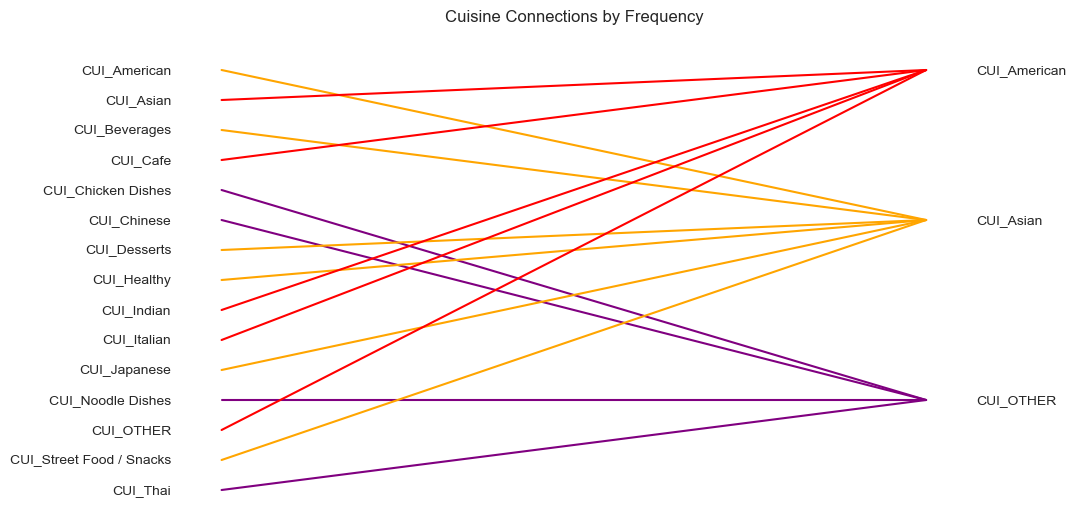

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))

# Positioning for left and right labels
left_y = {cuisine: i for i, cuisine in enumerate(sorted(top_associations['Cuisine'], reverse=True))}
right_y = {assoc: i for i, assoc in enumerate(sorted(top_associations['Associated_Cuisine'], reverse=True),)}

color_map = {
    "CUI_Asian": "orange",
    "CUI_American": "red",
    "CUI_OTHER": "purple"
}

# Plot left labels
for cuisine, y in left_y.items():
    ax.text(0.1, y, cuisine, ha='right', va='center', fontsize=10)

# Plot right labels
for assoc_cuisine, y in right_y.items():
    ax.text(0.9, y, assoc_cuisine, ha='left', va='center', fontsize=10)

# Draw connecting lines with thickness based on Frequency
for _, row in top_associations.iterrows():
    cuisine_y = left_y[row['Cuisine']]
    assoc_cuisine_y = right_y[row['Associated_Cuisine']]
    color = color_map[row['Associated_Cuisine']]
    ax.plot([0.15, 0.85], [cuisine_y, assoc_cuisine_y], 'k-', color=color)

# Customize plot appearance
ax.axis('off')  # Turn off the axis
plt.title("Cuisine Connections by Frequency", pad=20)
plt.show()

In [75]:
df["hours_of_activity"] = df[hr_cols].apply(lambda row: [hr for hr in range(24) if row[f"HR_{hr}"] > 0], axis=1)

co_occurrences = []
for row in df["hours_of_activity"]:
    co_occurrences.extend(list(combinations(row, 2)))

df.drop(columns=["hours_of_activity"], inplace=True)
co_occurrences
co_occurrence_counts = Counter(co_occurrences)

co_occurrence_df = pd.DataFrame(co_occurrence_counts.items(), columns=['Co_occurrence', 'Frequency']).sort_values(by='Frequency', ascending=False)
co_occurrence_df

association_data = []
for (hr1, hr2), freq in zip(co_occurrence_df['Co_occurrence'], co_occurrence_df['Frequency']):
    association_data.append({'hr1': hr1, 'hr2': hr2, 'Frequency': freq})
    association_data.append({'hr1': hr2, 'hr2': hr1, 'Frequency': freq})
df_association = pd.DataFrame(association_data)

top_associations = df_association.groupby('hr1').apply(lambda x: x.nlargest(1, 'Frequency')).reset_index(drop=True)
top_associations


hr1  hr2  Frequency
0     0    1        258
1     1    3        297
2     2    3        451
3     3    4        704
4     4    3        704
5     5    4        612
6     6   10        485
7     7   10        562
8     8    9       1035
9     9   10       1913
10   10   11       2379
11   11   12       2509
12   12   11       2509
13   13   12       1925
14   14   15       1698
15   15   16       2459
16   16   17       2989
17   17   16       2989
18   18   17       2818
19   19   18       2146
20   20   19       1289
21   21   19        652
22   22   19        354
23   23   11        280

In [76]:

df["days_of_activity"] = df[dow_cols].apply(lambda row: [dow for dow in range(7) if row[f"DOW_{dow}"] > 0], axis=1)
co_occurrences = []
for row in df["days_of_activity"]:
    co_occurrences.extend(list(combinations(row, 2)))

df.drop(columns=["days_of_activity"], inplace=True)
co_occurrences
co_occurrence_counts = Counter(co_occurrences)

co_occurrence_df = pd.DataFrame(co_occurrence_counts.items(), columns=['Co_occurrence', 'Frequency']).sort_values(by='Frequency', ascending=False)
co_occurrence_df

association_data = []
for (dw1, dw2), freq in zip(co_occurrence_df['Co_occurrence'], co_occurrence_df['Frequency']):
    association_data.append({'dw1': dw1, 'dw2': dw2, 'Frequency': freq})
    association_data.append({'dw1': dw2, 'dw2': dw1, 'Frequency': freq})
df_association = pd.DataFrame(association_data)

top_associations = df_association.groupby('dw1').apply(lambda x: x.nlargest(1, 'Frequency')).reset_index(drop=True)
top_associations

dw1  dw2  Frequency
0    0    4       5345
1    1    4       5403
2    2    4       5664
3    3    4       5862
4    4    3       5862
5    5    6       6046
6    6    5       6046

<h2 id='data-preprocessing'>5. Data preprocessing</h2>

<h3 id=''>5.1 Missing values</h3>